# LVL2 DVs Master analysis
author: Camillo Moschner | date: 04.03.23

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
from copy import deepcopy 
from itertools import chain
from ipywidgets import interact 

# Function Defintions

In [2]:
def divide_chunks(l, n):
    """Break a list into chunks of size N in Python (https://www.geeksforgeeks.org/break-list-chunks-size-n-python/) 
    """
    result_l = []
    for i in range(0, len(l), n):
        result_l.append(l[i:i + n])
    return result_l

from scipy.optimize import curve_fit
#import sympy as sy

def sigmoid(x, L ,x0, k, b):
    """Cam's version"""#https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

# def func(x, a, b, c): # Hill sigmoidal equation from zunzun.com
#     return  a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

def sigmoid_function(xdata, x0, k):
    y = np.exp(-k*(xdata-x0)) / (1 + np.exp(-k*(xdata-x0)))
    return y

# def sigmoid_derivative(x, x0, k):
#     f = np.exp(-k*(x-x0))
#     return -k / f

In [3]:
@interact
def show(idx=(0,1000), 
         L=(0,5, 0.1),
         x0=(50,500), 
         k=(0,1,0.01), 
         b=(0,3,0.1)):
    y = [sigmoid(x, L ,x0, k, b) for x in range(idx)]
    plt.plot(list(range(idx)),y)
    plt.ylim(0,5)
    plt.show()
    plt.close()

interactive(children=(IntSlider(value=500, description='idx', max=1000), FloatSlider(value=2.0, description='L…

## Load Plate Data

### t1 & also t2: techn_replicates_no = 3 (both) 
  - t1: data: gain800, OD600, OD900
  - t2: data: gain800, OD600, OD800
  - construct_levels
    - 'LVL2_NTC'
    - 'pJUMP47-2A(pSC101)'
    - 'pJUMP43-2A(pBBR1)'
    - 'pJUMP46-2A(p15A)'
    - 'pJUMP44-2A(pRO1600-ColE1)'
    - 'pJUMP48-2A(pUC)']
  - host
    - 'DH5a'
  - media
    - 'EZRDM'
  - abx_c_levels (Streptomycin; units: ug/ml)
    - '0ug'
    - '25ug'
    - '50ug'
    - '75ug'
    - '100ug'

In [4]:
# -------------------------------- experiment t1 --------------------------------
t1_FI_gain800_df = pd.read_csv(f"220924_cm967_JUMPLVL2DVs_t1{os.path.sep}DATA{os.path.sep}220924_cm967_protocol1sfGFP.csv",index_col=0)
t1_OD600_df = pd.read_csv(f"220924_cm967_JUMPLVL2DVs_t1{os.path.sep}DATA{os.path.sep}220924_cm967_protocol2_OD600.csv",index_col=0)
t1_OD900_df = pd.read_csv(f"220924_cm967_JUMPLVL2DVs_t1{os.path.sep}DATA{os.path.sep}220924_cm967_protocol3_OD900.csv",index_col=0)
# pre-process
t1_FI_gain800_df.index = t1_FI_gain800_df.index/60
t1_OD600_df.index = t1_OD600_df.index/60
t1_OD900_df.index = t1_OD900_df.index/60
# remove empty wells
empty_well_list = []
t1_FI_gain800_df.drop(columns=empty_well_list,inplace=True)
t1_OD600_df.drop(columns=empty_well_list,inplace=True)
t1_OD900_df.drop(columns=empty_well_list,inplace=True)
# -------------------------------- experiment t2 --------------------------------
t2_FI_gain800_df = pd.read_csv(f"220925_cm967_JUMPLVL2DVs_t2{os.path.sep}DATA{os.path.sep}220925_cm967_protocol1_sfGFPgain800.csv",index_col=0)
t2_OD600_df = pd.read_csv(f"220925_cm967_JUMPLVL2DVs_t2{os.path.sep}DATA{os.path.sep}220925_cm967_protocol2_OD600.csv",index_col=0)
t2_OD800_df = pd.read_csv(f"220925_cm967_JUMPLVL2DVs_t2{os.path.sep}DATA{os.path.sep}220925_cm967_protocol2_OD800.csv",index_col=0)
# pre-process
t2_FI_gain800_df.index = t2_FI_gain800_df.index/60
t2_OD600_df.index = t2_OD600_df.index/60
t2_OD800_df.index = t2_OD800_df.index/60
# remove empty wells
empty_well_list = []
t2_FI_gain800_df.drop(columns=empty_well_list,inplace=True)
t2_OD600_df.drop(columns=empty_well_list,inplace=True)
t2_OD800_df.drop(columns=empty_well_list,inplace=True)

### t3: techn_replicates_no = 5
  - data: gain850, OD800
  - construct_levels
    - 'LVL2_NTC'
    - 'pJUMP47-2A(pSC101)'
    - 'pJUMP43-2A(pBBR1)'
    - 'pJUMP46-2A(p15A)'
    - 'pJUMP44-2A(pRO1600-ColE1)'
    - 'pJUMP48-2A(pUC)']
  - host
    - 'DH5a'
  - media
    - 'EZRDM'
    - 'LB'
    - 'TB'
  - abx_c_levels (Streptomycin; units: ug/ml)
    - '40ug'

In [5]:
# -------------------------------- experiment t3 --------------------------------
t3_FI_gain850_df = pd.read_csv(f"221017_cm967_JUMPLVL2DVs_t3_DE344{os.path.sep}DATA{os.path.sep}221017_LVL2DVs_t3_DE344_gain850.csv",index_col=0)
t3_OD800_df = pd.read_csv(f"221017_cm967_JUMPLVL2DVs_t3_DE344{os.path.sep}DATA{os.path.sep}221017_LVL2DVs_t3_DE344_OD800.csv",index_col=0)
# pre-process
t3_FI_gain850_df.index = t3_FI_gain850_df.index/60
t3_OD800_df.index = t3_OD800_df.index/60
# remove empty wells
empty_well_list = []
t3_FI_gain850_df.drop(columns=empty_well_list,inplace=True)
t3_OD800_df.drop(columns=empty_well_list,inplace=True)

### t3: techn_replicates_no = 6
  - data: gain1000, OD800
  - construct_levels
    - 'LVL2_NTC'
    - 'pJUMP47-2A(pSC101)'
    - 'pJUMP43-2A(pBBR1)'
    - 'pJUMP46-2A(p15A)'
    - 'pJUMP44-2A(pRO1600-ColE1)'
    - 'pJUMP48-2A(pUC)']
  - host
    - 'DE344'
    - 'DH5a'
  - media
    - 'EZRDM'
  - abx_c_levels (Streptomycin; units: ug/ml)
    - '40ug'

In [6]:
# -------------------------------- experiment t4 --------------------------------
t4_FI_gain1000_df = pd.read_csv(f"221020_cm967_JUMPLVL2DVs_t4_DE344DH5a{os.path.sep}DATA{os.path.sep}221020_LVL2DVs_t4_DE344DH5a_sfGFPgain1000.csv",index_col=0)
t4_OD800_df = pd.read_csv(f"221020_cm967_JUMPLVL2DVs_t4_DE344DH5a{os.path.sep}DATA{os.path.sep}221020_LVL2DVs_t4_DE344DH5a_OD800.csv",index_col=0)
# pre-process
t4_FI_gain1000_df.index = t4_FI_gain1000_df.index/60
t4_OD800_df.index = t4_OD800_df.index/60
# remove empty wells
empty_well_list = []
t4_FI_gain1000_df.drop(columns=empty_well_list,inplace=True)
t4_OD800_df.drop(columns=empty_well_list,inplace=True)

---
## Load Plate Encryption

In [7]:
t1_plate_decryption_df = pd.read_csv(f"220924_cm967_JUMPLVL2DVs_t1{os.path.sep}experimental_plan{os.path.sep}220924_decryption_spreadsheet.csv",index_col=0)
t2_plate_decryption_df = pd.read_csv(f"220925_cm967_JUMPLVL2DVs_t2{os.path.sep}experimental_plan{os.path.sep}220925_decryption_spreadsheet.csv",index_col=0)
t3_plate_decryption_df = pd.read_csv(f"221017_cm967_JUMPLVL2DVs_t3_DE344{os.path.sep}experimental_plan{os.path.sep}221017_decryption_spreadsheet.csv",index_col=0)
t4_plate_decryption_df = pd.read_csv(f"221020_cm967_JUMPLVL2DVs_t4_DE344DH5a{os.path.sep}experimental_plan{os.path.sep}221020_decryption_spreadsheet.csv",index_col=0)
# remove empty wells
# [ x.T.drop(columns=empty_well_list,inplace=True).T for x in [t1_plate_decryption_df,t2_plate_decryption_df,t3_plate_decryption_df,t4_plate_decryption_df]]

In [8]:
(5*2*3*3+4) * 4

376

In [9]:
# Remove samples that should not be included in the analysis
t1_plate_decryption_df = t1_plate_decryption_df.loc[t1_plate_decryption_df.samples.isin(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'])]
t2_plate_decryption_df = t2_plate_decryption_df.loc[t2_plate_decryption_df.samples.isin(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'])]
t3_plate_decryption_df = t3_plate_decryption_df.loc[t3_plate_decryption_df.samples.isin(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'])]
t4_plate_decryption_df = t4_plate_decryption_df.loc[t4_plate_decryption_df.samples.isin(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'])]

In [10]:
summary_decryption_list = [t1_plate_decryption_df, t2_plate_decryption_df, t3_plate_decryption_df, t4_plate_decryption_df]

If you have to change the sample names and save the new decryption spreadsheet:

In [11]:
t1_plate_decryption_df.samples.unique()


array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object)

# FI

In [12]:
summary_FI_list = [t1_FI_gain800_df, t2_FI_gain800_df, t3_FI_gain850_df, t4_FI_gain1000_df]

## Process & Normalise data
1. subtract all FI values per experiment by the mean NCC

calibration_standard = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)

2. divide all FI values by the calibration_standard

In [13]:
t1_plate_decryption_df.loc[t1_plate_decryption_df.samples == 'NCC'].index

Index(['A01', 'B01', 'C01', 'D01', 'E01', 'F01'], dtype='object')

In [14]:
@interact
def show(idx=(0,3)):
    summary_FI_list[idx][t1_plate_decryption_df.loc[(t1_plate_decryption_df.abx_c == 0) & (t1_plate_decryption_df.samples == 'pJUMP47-2A(pSC101)')].index].plot()

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

In [15]:
[x.media.unique() for x in summary_decryption_list], [x.host.unique() for x in summary_decryption_list], [x.samples.unique() for x in summary_decryption_list]

([array(['EZRDM'], dtype=object),
  array(['EZRDM'], dtype=object),
  array(['EZRDM', 'LB', 'TB'], dtype=object),
  array(['EZRDM'], dtype=object)],
 [array([nan, 'DH5a'], dtype=object),
  array([nan, 'DH5a'], dtype=object),
  array([nan, 'DE344'], dtype=object),
  array([nan, 'DE344', 'DH5a'], dtype=object)],
 [array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object)])

### t1

In [16]:
# Subtract background
t1_NCC_indices = summary_decryption_list[0].loc[(summary_decryption_list[0].samples=='NCC')].index
t1_grand_mean_NCC = t1_FI_gain800_df[t1_NCC_indices].mean().mean()
t1_FI_gain800_df_norm = deepcopy(t1_FI_gain800_df)
t1_FI_gain800_df_norm = t1_FI_gain800_df_norm- t1_grand_mean_NCC
print(f"t1_grand_mean_NCC = {round(t1_grand_mean_NCC, 3)}")
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t1_CalStand_indices = summary_decryption_list[0].loc[(summary_decryption_list[0].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[0].abx_c==0)].index
t1_CalStand_max_mean = t1_FI_gain800_df_norm[t1_CalStand_indices].max().mean()
print(f"t1_CalStand_indices : {t1_CalStand_indices}")
print(f"t1_CalStand_max_mean = {round(t1_CalStand_max_mean, 3)}")
t1_FI_gain800_df_norm = t1_FI_gain800_df_norm/t1_CalStand_max_mean

t1_grand_mean_NCC = 32.989
t1_CalStand_indices : Index(['F03', 'G03', 'H03'], dtype='object')
t1_CalStand_max_mean = 5571.344


<Axes: >

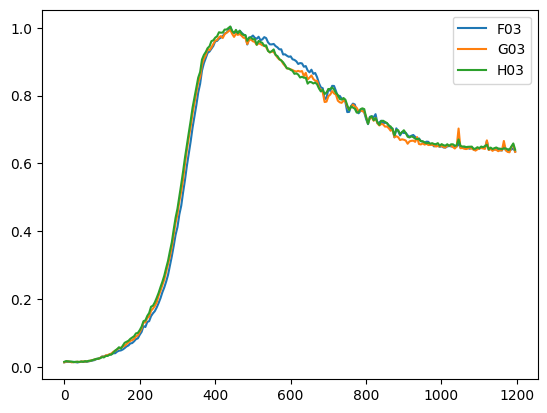

In [17]:
t1_FI_gain800_df_norm[t1_CalStand_indices].plot()

### t2

t2_grand_mean_NCC = 32.718
t2_CalStand_indices : Index(['F03', 'G03', 'H03'], dtype='object')
t2_CalStand_max_mean = 5323.282


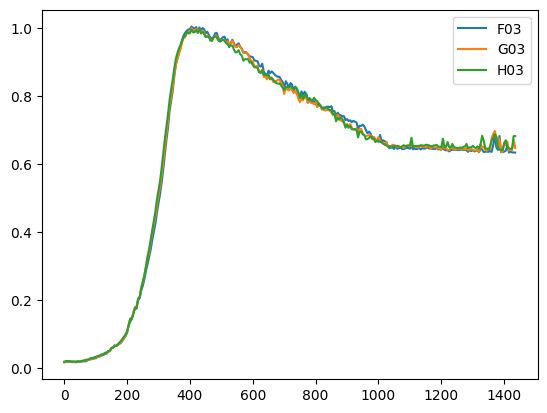

In [18]:
# Subtract background
t2_NCC_indices = summary_decryption_list[1].loc[(summary_decryption_list[1].samples=='NCC')].index
t2_grand_mean_NCC = t2_FI_gain800_df[t2_NCC_indices].mean().mean()
t2_FI_gain800_df_norm = deepcopy(t2_FI_gain800_df)
t2_FI_gain800_df_norm = t2_FI_gain800_df_norm- t2_grand_mean_NCC
print(f"t2_grand_mean_NCC = {round(t2_grand_mean_NCC, 3)}")
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t2_CalStand_indices = summary_decryption_list[1].loc[(summary_decryption_list[1].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[1].abx_c==0)].index
t2_CalStand_max_mean = t2_FI_gain800_df_norm[t2_CalStand_indices].max().mean()
t2_FI_gain800_df_norm = t2_FI_gain800_df_norm/t2_CalStand_max_mean
print(f"t2_CalStand_indices : {t2_CalStand_indices}")
print(f"t2_CalStand_max_mean = {round(t2_CalStand_max_mean, 3)}")
t2_FI_gain800_df_norm[t2_CalStand_indices].plot();

### t3

In [19]:
# Create deepcopy for background processing & normalisation
t3_FI_gain850_df_norm = deepcopy(t3_FI_gain850_df)

# Handle every medium background individually
media_bkgd_grand_means = []
for medium_x in summary_decryption_list[2].media.unique():
    # Identify indices for each medium category
    t3_NCC_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='NCC') & (summary_decryption_list[2].media==medium_x)].index
    t3_mediumx_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].media==medium_x)].index
    # Calculate medium background mean
    t3_grand_mean_NCC_medium_x = t3_FI_gain850_df[t3_NCC_indices].mean().mean()
    media_bkgd_grand_means.append(t3_grand_mean_NCC_medium_x)
    display(t3_NCC_indices)
    # Subtract medium background from corresponding medium-containing wells
    t3_FI_gain850_df_norm[t3_mediumx_indices] = t3_FI_gain850_df_norm[t3_mediumx_indices] - t3_grand_mean_NCC_medium_x
    print(round(t3_grand_mean_NCC_medium_x,2))
    
# sns.barplot(['EZRDM', 'LB', 'TB'], media_bkgd_grand_means);

Index(['A01', 'B01', 'C01', 'D01', 'E01'], dtype='object')

41.4


Index(['F01', 'G01', 'H01', 'A02', 'B02'], dtype='object')

1857.38


Index(['C02', 'D02', 'E02', 'F02', 'G02'], dtype='object')

5695.97


/Users/camillomoschner/anaconda3/envs/ia-env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


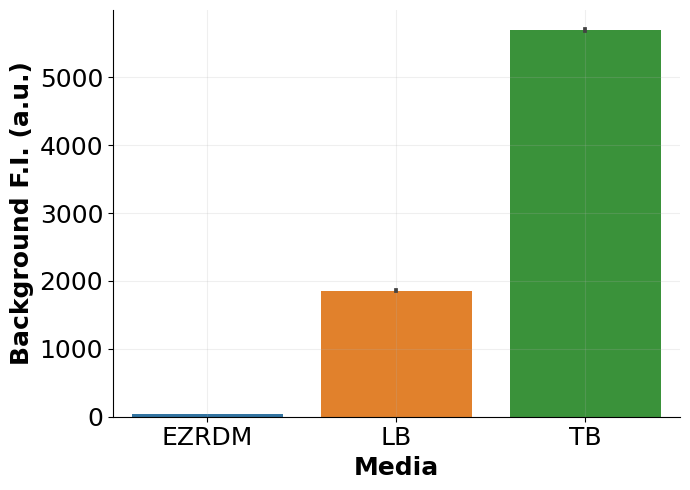

In [20]:
# Barplot for visualisation of background intensity
t3_FI_gain850_df_for_barplorts = deepcopy(t3_FI_gain850_df[summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='NCC')].index])
raw_data = {'x': list(chain.from_iterable([x*5 for x in [['EZRDM'],['LB'],['TB']]])),'y': list(t3_FI_gain850_df_for_barplorts.mean())           }

fig = plt.figure(figsize=(7,5), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
sns.barplot(x='x', y='y', data=raw_data) #log=True

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("Media",fontsize=18, fontweight='bold')
ax1.set_ylabel("Background F.I. (a.u.)",fontsize=18, fontweight='bold')
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
# plt.savefig(f"FI_bkgd.png", dpi=300)
plt.show()

In [21]:
# Calculate Calibration standard
t3_CalStand_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[2].media=='EZRDM')].index
t3_CalStand_max_mean = t3_FI_gain850_df_norm[t3_CalStand_indices].max().mean()
print(f"t3_CalStand_indices : {t3_CalStand_indices}")
print(f"t3_CalStand_max_mean = {round(t3_CalStand_max_mean, 3)}")
# And use it to normalise all data towards it
t3_FI_gain850_df_norm = t3_FI_gain850_df_norm / t3_CalStand_max_mean
t3_CalStand_max_mean

t3_CalStand_indices : Index(['G04', 'H04', 'A05', 'B05', 'C05'], dtype='object')
t3_CalStand_max_mean = 8401.403


8401.402777777777

<Axes: >

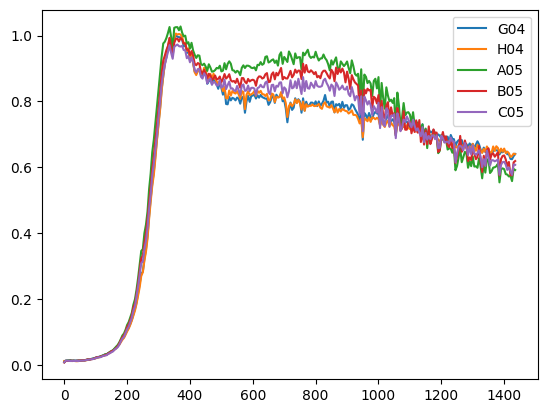

In [22]:
t3_FI_gain850_df_norm[t3_CalStand_indices].plot()

### t4

In [23]:
# Subtract background
t4_NCC_indices = summary_decryption_list[3].loc[(summary_decryption_list[3].samples=='NCC')].index
t4_grand_mean_NCC = t4_FI_gain1000_df[t3_NCC_indices].mean().mean()
t4_FI_gain1000_df_norm = deepcopy(t4_FI_gain1000_df)
t4_FI_gain1000_df_norm = t4_FI_gain1000_df_norm- t4_grand_mean_NCC
print(f"t4_grand_mean_NCC = {round(t4_grand_mean_NCC, 3)}")

t4_grand_mean_NCC = 276.396


t4_CalStand_indices : Index(['G07', 'H07', 'A08', 'B08', 'C08', 'D08'], dtype='object')
t4_CalStand_max_mean = 19884.771


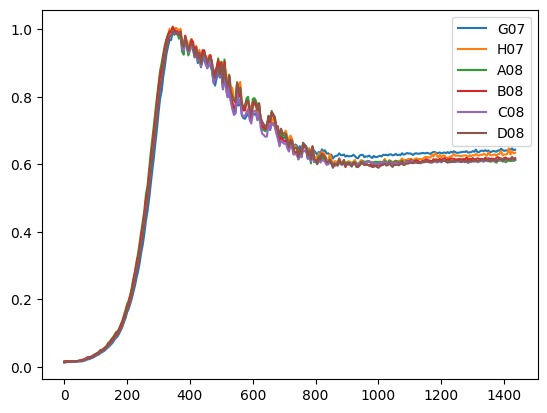

In [24]:
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t4_CalStand_indices = summary_decryption_list[3].loc[(summary_decryption_list[3].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[3].host=='DH5a')].index
t4_CalStand_max_mean = t4_FI_gain1000_df_norm[t4_CalStand_indices].max().mean()
t4_FI_gain1000_df_norm = t4_FI_gain1000_df_norm/t4_CalStand_max_mean
print(f"t4_CalStand_indices : {t4_CalStand_indices}")
print(f"t4_CalStand_max_mean = {round(t4_CalStand_max_mean, 3)}")
t4_FI_gain1000_df_norm[t4_CalStand_indices].plot();

### Summary list

In [25]:
summary_FI_list_norm = [t1_FI_gain800_df_norm, t2_FI_gain800_df_norm, t3_FI_gain850_df_norm, t4_FI_gain1000_df_norm]

In [26]:
@interact
def show(idx=(0,3)):
    summary_FI_list_norm[idx][t1_plate_decryption_df.loc[(t1_plate_decryption_df.abx_c == 0) & (t1_plate_decryption_df.samples == 'pJUMP47-2A(pSC101)')].index].plot()

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

# OD

In [27]:
summary_OD_list = [t1_OD900_df, t2_OD800_df, t3_OD800_df, t4_OD800_df]

## Process & Normalise data
1. subtract all FI values per experiment by the mean NCC

calibration_standard = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)

2. divide all FI values by the calibration_standard

In [28]:
t1_plate_decryption_df.loc[t1_plate_decryption_df.samples == 'NCC'].index

Index(['A01', 'B01', 'C01', 'D01', 'E01', 'F01'], dtype='object')

In [29]:
@interact
def show(idx=(0,3)):
    summary_OD_list[idx][t1_plate_decryption_df.loc[(t1_plate_decryption_df.abx_c == 0) & (t1_plate_decryption_df.samples == 'pJUMP47-2A(pSC101)')].index].plot()

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

In [30]:
[x.media.unique() for x in summary_decryption_list], [x.host.unique() for x in summary_decryption_list], [x.samples.unique() for x in summary_decryption_list]

([array(['EZRDM'], dtype=object),
  array(['EZRDM'], dtype=object),
  array(['EZRDM', 'LB', 'TB'], dtype=object),
  array(['EZRDM'], dtype=object)],
 [array([nan, 'DH5a'], dtype=object),
  array([nan, 'DH5a'], dtype=object),
  array([nan, 'DE344'], dtype=object),
  array([nan, 'DE344', 'DH5a'], dtype=object)],
 [array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object),
  array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
         'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object)])

### t1

In [31]:
# Subtract background
t1_NCC_indices = summary_decryption_list[0].loc[(summary_decryption_list[0].samples=='NCC')].index
t1_grand_mean_NCC = t1_OD600_df[t1_NCC_indices].mean().mean()
t1_OD600_df_norm = deepcopy(t2_OD600_df)
t1_OD600_df_norm = t1_OD600_df_norm - t1_grand_mean_NCC
print(f"t1_grand_mean_NCC = {round(t1_grand_mean_NCC, 3)}")
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t1_CalStand_indices = summary_decryption_list[0].loc[(summary_decryption_list[0].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[0].abx_c==0)].index
# Carrying capacity as normalisation standard
df = t1_OD600_df_norm[t1_CalStand_indices]
x= df.index
y= df.mean(axis=1)
xdata_fit = y[:y.idxmax()].index
ydata_fit = y[:y.idxmax()]
p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
# print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
t1_CalStand_max_mean = t1_OD600_df_norm[t1_CalStand_indices].max().mean()
t1_CalStand_carrying_capacity = popt[0]
print(f"t1_CalStand_indices : {t1_CalStand_indices}")
print(f"t1_CalStand_carrying_capacity : {t1_CalStand_carrying_capacity}")
print(f"t1_CalStand_max_mean = {round(t1_CalStand_max_mean, 3)}")
t1_OD600_df_norm = t1_OD600_df_norm / t1_CalStand_carrying_capacity
t1_OD600_df[t1_CalStand_indices].describe()

t1_grand_mean_NCC = 0.485
t1_CalStand_indices : Index(['F03', 'G03', 'H03'], dtype='object')
t1_CalStand_carrying_capacity : 0.791318329897239
t1_CalStand_max_mean = 1.099


/Users/camillomoschner/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


F03         G03         H03
count  240.000000  240.000000  240.000000
mean     1.110572    1.134349    1.091016
std      0.356581    0.340221    0.359157
min      0.439600    0.467600    0.422000
25%      0.781950    0.852950    0.784100
50%      1.293400    1.308000    1.271600
75%      1.370575    1.377475    1.356625
max      1.452200    1.470300    1.418900

<Axes: >

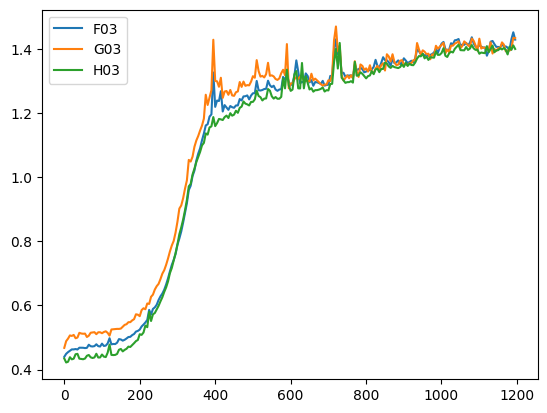

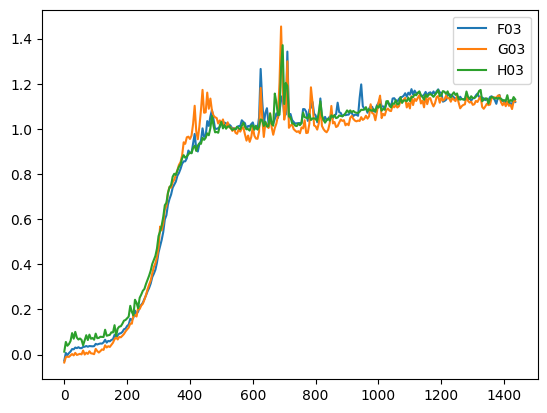

In [32]:
t1_OD600_df[t1_CalStand_indices].plot(); t1_OD600_df_norm[t1_CalStand_indices].plot()

### t2

In [33]:
# Subtract background
t2_NCC_indices = summary_decryption_list[1].loc[(summary_decryption_list[1].samples=='NCC')].index
t2_grand_mean_NCC = t2_OD800_df[t2_NCC_indices].mean().mean()
t2_OD800_df_norm = deepcopy(t2_OD800_df)
t2_OD800_df_norm = t2_OD800_df_norm - t2_grand_mean_NCC
print(f"t2_grand_mean_NCC = {round(t2_grand_mean_NCC, 3)}")
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t2_CalStand_indices = summary_decryption_list[1].loc[(summary_decryption_list[1].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[1].abx_c==0)].index
# t2_CalStand_max_mean = t2_OD800_df_norm[t2_CalStand_indices].max().mean()
# t2_OD800_df_norm = t2_OD800_df_norm / t2_CalStand_max_mean
# print(f"t2_CalStand_indices : {t2_CalStand_indices}")
# print(f"t2_CalStand_max_mean = {round(t2_CalStand_max_mean, 3)}")
# t2_OD800_df[t2_CalStand_indices].plot(); t2_OD800_df_norm[t2_CalStand_indices].plot();
# t2_OD800_df[t2_CalStand_indices].describe()

df = t2_OD800_df_norm[t1_CalStand_indices]
x= df.index
y= df.mean(axis=1)
xdata_fit = y[:y.idxmax()].index
ydata_fit = y[:y.idxmax()]
p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
# print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
t2_CalStand_max_mean = t2_OD800_df_norm[t1_CalStand_indices].max().mean()
t2_CalStand_carrying_capacity = popt[0]
print(f"t2_CalStand_indices : {t2_CalStand_indices}")
print(f"t2_CalStand_carrying_capacity : {t2_CalStand_carrying_capacity}")
print(f"t2_CalStand_max_mean = {round(t2_CalStand_max_mean, 3)}")
t2_OD800_df_norm = t2_OD800_df_norm / t2_CalStand_carrying_capacity
t2_OD800_df[t1_CalStand_indices].describe()

t2_grand_mean_NCC = 0.503
t2_CalStand_indices : Index(['F03', 'G03', 'H03'], dtype='object')
t2_CalStand_carrying_capacity : 0.46126342135446086
t2_CalStand_max_mean = 0.571


F03         G03         H03
count  288.000000  288.000000  288.000000
mean     0.873007    0.862327    0.885595
std      0.183961    0.184897    0.172121
min      0.462300    0.454800    0.489100
25%      0.853850    0.860025    0.874475
50%      0.959650    0.945100    0.961350
75%      0.993325    0.982350    0.999375
max      1.041600    1.066600    1.113400

<Axes: >

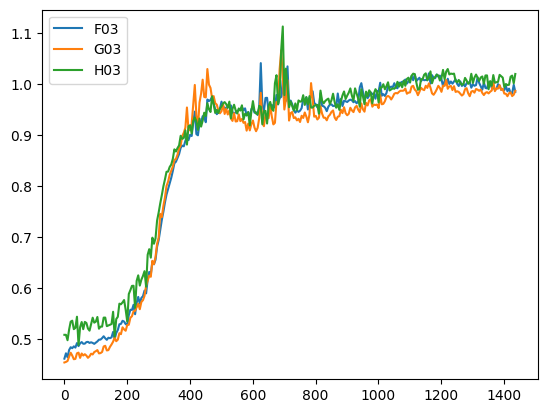

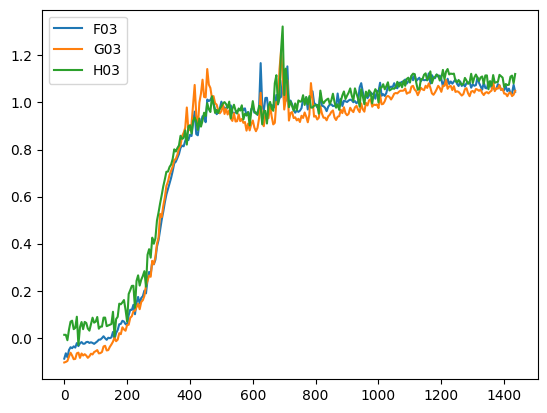

In [34]:
t2_OD800_df[t1_CalStand_indices].plot(); t2_OD800_df_norm[t1_CalStand_indices].plot()

### t3

In [35]:
# Create deepcopy for background processing & normalisation
t3_OD800_df_norm = deepcopy(t3_OD800_df)

# Handle every medium background individually
media_bkgd_OD_grand_means = []
for medium_x in summary_decryption_list[2].media.unique():
    # Identify indices for each medium category
    t3_NCC_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='NCC') & (summary_decryption_list[2].media==medium_x)].index
    t3_mediumx_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].media==medium_x)].index
    # Calculate medium background mean
    t3_grand_mean_NCC_medium_x = t3_OD800_df_norm[t3_NCC_indices].mean().mean()
    media_bkgd_OD_grand_means.append(t3_grand_mean_NCC_medium_x)
    display(t3_NCC_indices)
    # Subtract medium background from corresponding medium-containing wells
    t3_OD800_df_norm[t3_mediumx_indices] = t3_OD800_df_norm[t3_mediumx_indices] - t3_grand_mean_NCC_medium_x
    print(f"t3_grand_mean_NCC_medium_x = {round(t3_grand_mean_NCC_medium_x,2)}")
    
# sns.barplot(['EZRDM', 'LB', 'TB'], media_bkgd_grand_means);

Index(['A01', 'B01', 'C01', 'D01', 'E01'], dtype='object')

t3_grand_mean_NCC_medium_x = 0.44


Index(['F01', 'G01', 'H01', 'A02', 'B02'], dtype='object')

t3_grand_mean_NCC_medium_x = 0.44


Index(['C02', 'D02', 'E02', 'F02', 'G02'], dtype='object')

t3_grand_mean_NCC_medium_x = 0.46


/Users/camillomoschner/anaconda3/envs/ia-env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


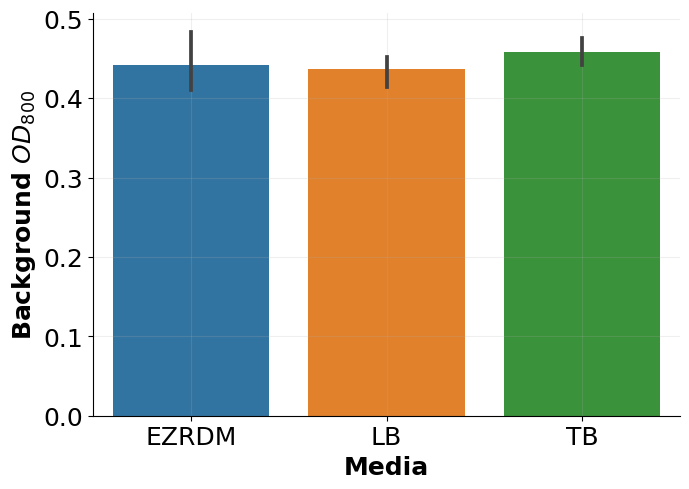

In [36]:
# Barplot for visualisation of background intensity
t3_OD800_df_for_barplorts = deepcopy(t3_OD800_df[summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='NCC')].index])
raw_data = {'x': list(chain.from_iterable([x*5 for x in [['EZRDM'],['LB'],['TB']]])),'y': list(t3_OD800_df_for_barplorts.mean())           }

fig = plt.figure(figsize=(7,5), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
sns.barplot(x='x', y='y', data=raw_data) #log=True

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("Media",fontsize=18, fontweight='bold')
ax1.set_ylabel("Background $OD_{800}$",fontsize=18, fontweight='bold')
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
# plt.savefig(f"OD800_bkgd.png", dpi=300)
plt.show()

In [37]:
summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[2].media=='EZRDM')]

cells   host             samples  media  abx_c  replicate    media_ID  \
G04     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          0  EZRDM|40ug   
H04     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          1  EZRDM|40ug   
A05     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          2  EZRDM|40ug   
B05     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          3  EZRDM|40ug   
C05     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          4  EZRDM|40ug   

                                  ID  \
G04  pJUMP47-2A(pSC101)|EZRDM|40ug|0   
H04  pJUMP47-2A(pSC101)|EZRDM|40ug|1   
A05  pJUMP47-2A(pSC101)|EZRDM|40ug|2   
B05  pJUMP47-2A(pSC101)|EZRDM|40ug|3   
C05  pJUMP47-2A(pSC101)|EZRDM|40ug|4   

                                          media_source  \
G04  B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
H04  B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
A05  B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
B05  B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
C05  B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   

                                         sample_source  \
G04  C1 of Opentrons 96 Well Aluminum Block with Ge...   
H04  C1 of Opentrons 96 Well Aluminum Block with Ge...   
A05  C1 of Opentrons 96 Well Aluminum Block with Ge...   
B05  C1 of Opentrons 96 Well Aluminum Block with Ge...   
C05  C1 of Opentrons 96 Well Aluminum Block with Ge...   

                                 destination   prep_date  \
G04  G4 of 3 on Temperature Module GEN2 on 3  2022-10-17   
H04  H4 of 3 on Temperature Module GEN2 on 3  2022-10-17   
A05  A5 of 3 on Temperature Module GEN2 on 3  2022-10-17   
B05  B5 of 3 on Temperature Module GEN2 on 3  2022-10-17   
C05  C5 of 3 on Temperature Module GEN2 on 3  2022-10-17   

                        samples_id  
G04  pJUMP47-2A(pSC101)|EZRDM|40ug  
H04  pJUMP47-2A(pSC101)|EZRDM|40ug  
A05  pJUMP47-2A(pSC101)|EZRDM|40ug  
B05  pJUMP47-2A(pSC101)|EZRDM|40ug  
C05  pJUMP47-2A(pSC101)|EZRDM|40ug

In [38]:
# Calculate Calibration standard
t3_CalStand_indices = summary_decryption_list[2].loc[(summary_decryption_list[2].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[2].media=='EZRDM')].index
t3_CalStand_max_mean = t3_OD800_df_norm[t3_CalStand_indices].max().mean()
print(f"t3_CalStand_indices : {t3_CalStand_indices}")
print(f"t3_CalStand_max_mean = {round(t3_CalStand_max_mean, 3)}")
# And use it to normalise all data towards it
t3_OD800_df_norm = t3_OD800_df_norm / t3_CalStand_max_mean
t3_OD800_df[t3_CalStand_indices].describe()

t3_CalStand_indices : Index(['G04', 'H04', 'A05', 'B05', 'C05'], dtype='object')
t3_CalStand_max_mean = 0.833


G04         H04         A05         B05         C05
count  288.000000  288.000000  288.000000  288.000000  288.000000
mean     0.864765    0.794364    1.008561    0.794854    0.874253
std      0.187893    0.170439    0.311035    0.199522    0.195421
min      0.433700    0.405900    0.411400    0.371700    0.450900
25%      0.867675    0.817950    0.880875    0.752700    0.832600
50%      0.908150    0.850850    1.021050    0.817100    0.890800
75%      0.946950    0.882350    1.293125    0.871925    0.949125
max      1.280900    1.180500    1.457600    1.202600    1.249600

<Axes: >

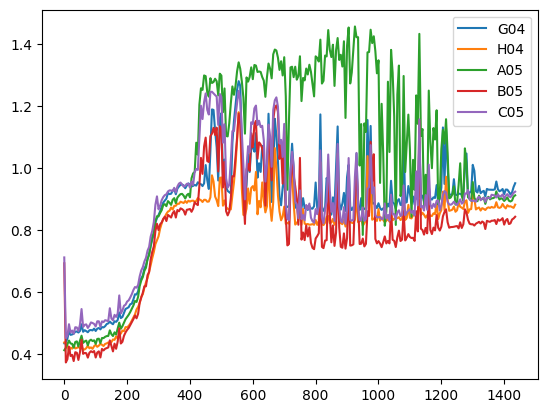

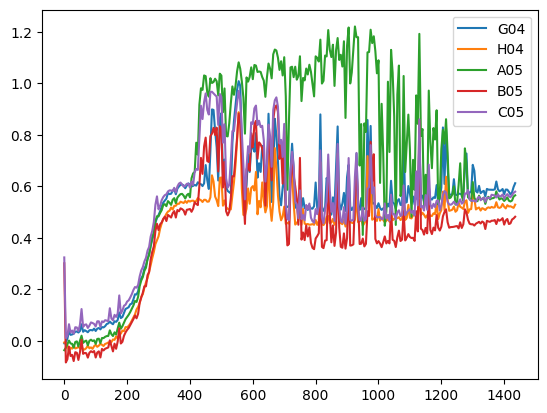

In [39]:
t3_OD800_df[t3_CalStand_indices].plot(); t3_OD800_df_norm[t3_CalStand_indices].plot()

### t4

In [40]:
# Subtract background
t4_NCC_indices = summary_decryption_list[3].loc[(summary_decryption_list[3].samples=='NCC')].index
t4_grand_mean_NCC = t4_OD800_df[t4_NCC_indices].mean().mean()
t4_OD800_df_norm = deepcopy(t4_OD800_df)
t4_OD800_df_norm = t4_OD800_df_norm- t4_grand_mean_NCC
print(f"t4_grand_mean_NCC = {round(t4_grand_mean_NCC, 3)}")

t4_grand_mean_NCC = 0.495


In [41]:
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
t4_CalStand_indices = summary_decryption_list[3].loc[(summary_decryption_list[3].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[3].host=='DH5a')].index
# Carrying capacity as normalisation standard
df = t4_OD800_df_norm[t1_CalStand_indices]
x= df.index
y= df.mean(axis=1)
xdata_fit = y[:y.idxmax()].index
ydata_fit = y[:y.idxmax()]
p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
# print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
t4_CalStand_max_mean = t4_OD800_df_norm[t1_CalStand_indices].max().mean()
t4_CalStand_carrying_capacity = popt[0]
print(f"t1_CalStand_indices : {t4_CalStand_indices}")
print(f"t1_CalStand_carrying_capacity : {t4_CalStand_carrying_capacity}")
print(f"t1_CalStand_max_mean = {round(t4_CalStand_max_mean, 3)}")
t4_OD800_df_norm = t4_OD800_df_norm / t4_CalStand_carrying_capacity
t4_OD800_df[t1_CalStand_indices].describe()

t1_CalStand_indices : Index(['G07', 'H07', 'A08', 'B08', 'C08', 'D08'], dtype='object')
t1_CalStand_carrying_capacity : 0.506952343451912
t1_CalStand_max_mean = 0.558


F03         G03         H03
count  288.000000  288.000000  288.000000
mean     0.907115    0.932182    0.926773
std      0.171590    0.178208    0.171288
min      0.470600    0.489400    0.485200
25%      0.949300    0.984925    0.970800
50%      0.980750    1.006650    1.000050
75%      0.995825    1.024425    1.014250
max      1.035900    1.064300    1.058800

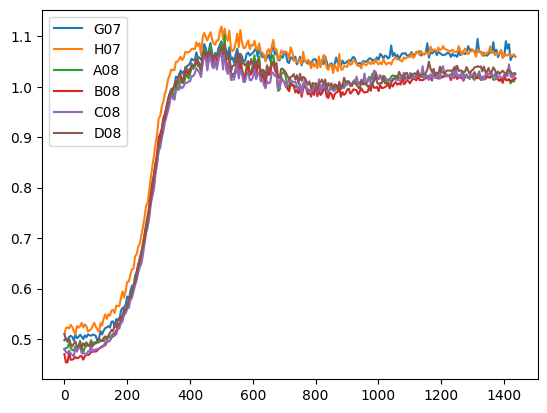

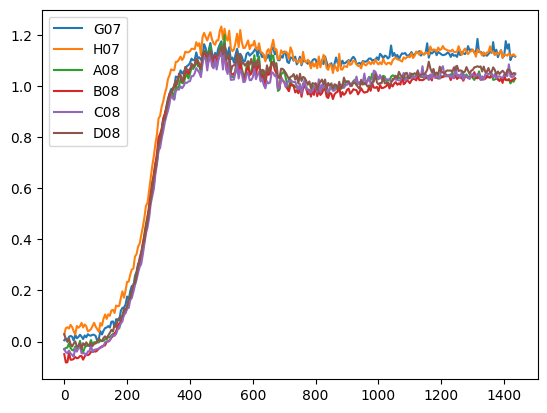

In [42]:
# Calculate calibration standard's max-mean & divide all data values to that value
# = (mean of pSC101 replicate max value) at (0 ug/ul abx) in (EZRDM) in (DH5a)
# t4_CalStand_indices = summary_decryption_list[3].loc[(summary_decryption_list[3].samples=='pJUMP47-2A(pSC101)') & (summary_decryption_list[3].host=='DH5a')].index
# t4_CalStand_max_mean = t4_OD800_df_norm[t4_CalStand_indices].max().mean()
# t4_OD800_df_norm = t4_OD800_df_norm / t4_CalStand_max_mean
# print(f"t4_CalStand_indices : {t4_CalStand_indices}")
# print(f"t4_CalStand_max_mean = {round(t4_CalStand_max_mean, 3)}")
t4_OD800_df[t4_CalStand_indices].plot(); t4_OD800_df_norm[t4_CalStand_indices].plot();

### Summary list

In [43]:
summary_OD_list_norm = [t1_OD600_df_norm, t2_OD800_df_norm, t3_OD800_df_norm, t4_OD800_df_norm]

In [44]:
@interact
def show(idx=(0,3)):
    if idx < 2:
        summary_OD_list_norm[idx][ summary_decryption_list[idx].loc[(summary_decryption_list[idx].samples == 'pJUMP47-2A(pSC101)') & (summary_decryption_list[idx].media == 'EZRDM')  
                                 & (summary_decryption_list[idx].abx_c == 0)].index ].plot()
    if idx == 2:
        summary_OD_list_norm[idx][ summary_decryption_list[idx].loc[(summary_decryption_list[idx].samples == 'pJUMP47-2A(pSC101)') & (summary_decryption_list[idx].media == 'EZRDM')  
                                ].index ].plot()
    if idx == 3:
        summary_OD_list_norm[idx][ summary_decryption_list[idx].loc[(summary_decryption_list[idx].samples == 'pJUMP47-2A(pSC101)') & (summary_decryption_list[idx].media == 'EZRDM')  
                                 & (summary_decryption_list[idx].host == 'DH5a')].index ].plot()

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

# FI Analysis

In [45]:
summary_decryption_list, summary_FI_list_norm

([    cells  host          samples  media  abx_c  replicate  \
  A01     n   NaN              NCC  EZRDM      0          0   
  B01     n   NaN              NCC  EZRDM      0          1   
  C01     n   NaN              NCC  EZRDM      0          2   
  D01     n   NaN              NCC  EZRDM    100          0   
  E01     n   NaN              NCC  EZRDM    100          1   
  ..    ...   ...              ...    ...    ...        ...   
  D12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          1   
  E12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          2   
  F12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          0   
  G12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          1   
  H12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          2   
  
                            ID  \
  A01                NTC|0ug|0   
  B01                NTC|0ug|1   
  C01                NTC|0ug|2   
  D01              NTC|100ug|0   
  E01              NTC|100ug|1   
  ..                       ...   
  D

In [46]:
summary_decryption_list[1]

cells  host          samples  media  abx_c  replicate  \
A01     n   NaN              NCC  EZRDM      0          0   
B01     n   NaN              NCC  EZRDM      0          1   
C01     n   NaN              NCC  EZRDM      0          2   
D01     y  DH5a               NC  EZRDM      0          0   
E01     y  DH5a               NC  EZRDM      0          1   
..    ...   ...              ...    ...    ...        ...   
D12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          1   
E12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          2   
F12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          0   
G12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          1   
H12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          2   

                          ID  \
A01                NTC|0ug|0   
B01                NTC|0ug|1   
C01                NTC|0ug|2   
D01         just_cells|0ug|0   
E01         just_cells|0ug|1   
..                       ...   
D12   pJUMP48-2A(pUC)|75ug|1   
E12   pJUMP48-2A(pUC)|75ug|2   
F12  pJUMP48-2A(pUC)|100ug|0   
G12  pJUMP48-2A(pUC)|100ug|1   
H12  pJUMP48-2A(pUC)|100ug|2   

                                          media_source  \
A01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
B01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
C01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
D01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
E01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
..                                                 ...   
D12  B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
E12  B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
F12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
G12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
H12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   

                                         sample_source  \
A01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
B01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
C01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
D01  B1 of Opentrons 96 Well Aluminum Block with Ge...   
E01  B1 of Opentrons 96 Well Aluminum Block with Ge...   
..                                                 ...   
D12  H1 of Opentrons 96 Well Aluminum Block with Ge...   
E12  H1 of Opentrons 96 Well Aluminum Block with Ge...   
F12  H1 of Opentrons 96 Well Aluminum Block with Ge...   
G12  H1 of Opentrons 96 Well Aluminum Block with Ge...   
H12  H1 of Opentrons 96 Well Aluminum Block with Ge...   

                                  destination   prep_date  \
A01   A1 of 3 on Temperature Module GEN2 on 3  2022-09-24   
B01   B1 of 3 on Temperature Module GEN2 on 3  2022-09-24   
C01   C1 of 3 on Temperature Module GEN2 on 3  2022-09-24   
D01   D1 of 3 on Temperature Module GEN2 on 3  2022-09-24   
E01   E1 of 3 on Temperature Module GEN2 on 3  2022-09-24   
..                                        ...         ...   
D12  D12 of 3 on Temperature Module GEN2 on 3  2022-09-24   
E12  E12 of 3 on Temperature Module GEN2 on 3  2022-09-24   
F12  F12 of 3 on Temperature Module GEN2 on 3  2022-09-24   
G12  G12 of 3 on Temperature Module GEN2 on 3  2022-09-24   
H12  H12 of 3 on Temperature Module GEN2 on 3  2022-09-24   

                samples_id  
A01                NTC|0ug  
B01                NTC|0ug  
C01                NTC|0ug  
D01         just_cells|0ug  
E01         just_cells|0ug  
..                     ...  
D12   pJUMP48-2A(pUC)|75ug  
E12   pJUMP48-2A(pUC)|75ug  
F12  pJUMP48-2A(pUC)|100ug  
G12  pJUMP48-2A(pUC)|100ug  
H12  pJUMP48-2A(pUC)|100ug  

[66 rows x 12 columns]

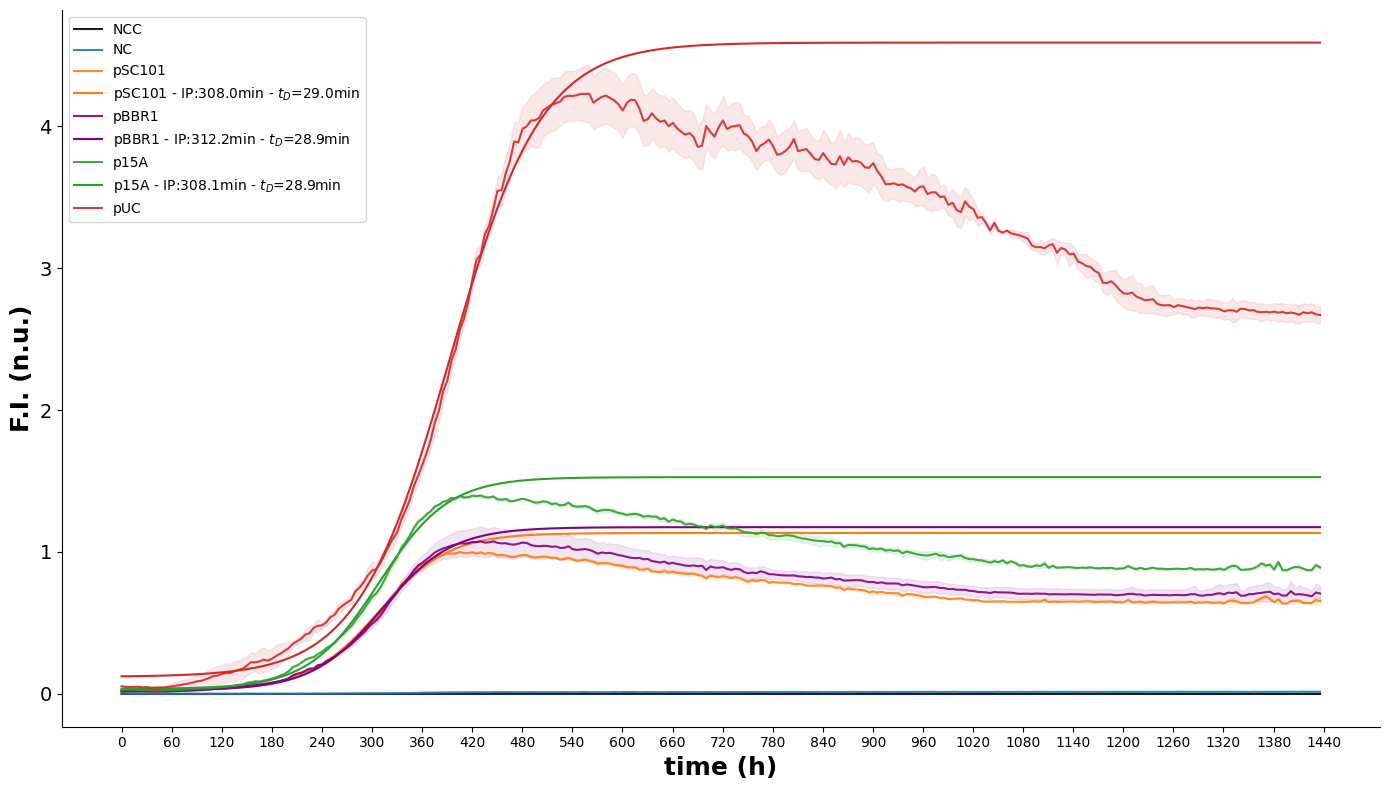

interactive(children=(IntSlider(value=1, description='idx', max=3), Dropdown(description='abx_', options=(0, 2…

In [48]:
@interact
def show(idx = (0,3),
         abx_ = [0,25,40,50,75,100]):
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].abx_c == abx_)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_FI_list_norm[idx][constr_indices]
    # Plot
    fig = plt.figure(figsize=(14,8), constrained_layout=True, tight_layout=True)
    gs = gridspec.GridSpec(1,1, figure=fig)
    ax1= fig.add_subplot(gs[0,0])
    standard_mpl_colors = {'NCC': 'black',
                           'NC' : 'tab:blue', 
                           'pSC101': 'tab:orange', 
                           'pBBR1': 'purple',
                           'p15A': 'tab:green', 
                           'pUC': 'tab:red'}
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        print(df.columns[0])
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1, color=standard_mpl_colors[current_sample_name])
        # Curve fit (excluding medium negative control)
        if dx > 1:
            p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
            popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
            # save fitted curve stats
            # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
            # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
            # popt_list.append(popt)
            ax1.plot(x, sigmoid(x, *popt), label=f"{current_sample_name} - IP:{round(popt[1],1)}min - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=standard_mpl_colors[current_sample_name])


    plt.yticks(fontsize=14)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
    ax1.set_ylabel("F.I. (n.u.)",fontsize=18, fontweight='bold')
    ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,21))
    ax1.set_yticks(np.arange(0,6, 0.5))
    ax1.grid(True,alpha=0.2)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    ax1.set_xlim([-10,1205])
    # plt.savefig(f"FI_hist_sample{sample_names[x]}_at_t{tp_t}.png", dpi=300)
    plt.show();
    plt.close();

### abx_c

/Users/camillomoschner/anaconda3/envs/ia-env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


0
1
2
3
4


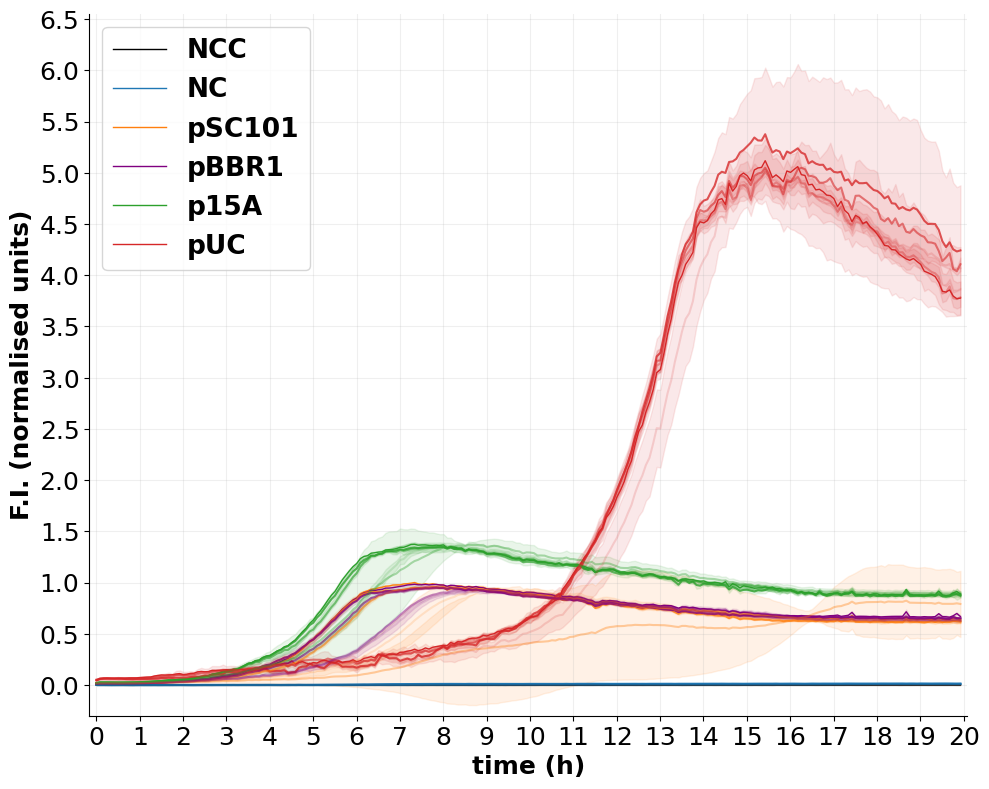

In [49]:
# Plot
fig = plt.figure(figsize=(10,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : 'tab:blue', 
                       'pSC101': 'tab:orange', 
                       'pBBR1': 'purple',
                       'p15A': 'tab:green', 
                       'pUC': 'tab:red'}
alpha_ = list(np.arange(1,0.1,-0.21))
idx = 0
for alpha_x, abx_ in enumerate([0,25,50,75,100]):
    print(alpha_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].abx_c == abx_)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_FI_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # if any([current_sample_name == 'pSC101', current_sample_name == 'pBBR1']):
        if alpha_x==0:
            ax1.plot(x, y, label=f"{current_sample_name}", color=standard_mpl_colors[current_sample_name], alpha=alpha_[alpha_x], linewidth=1) 
        else:
             ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[alpha_x]) 
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])
        # Curve fit (excluding medium negative control)
        # if dx > 1:
        #     p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
        #     popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        #     # save fitted curve stats
        #     # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        #     # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        #     # popt_list.append(popt)
        #     ax1.plot(x, sigmoid(x, *popt), label=f"{current_sample_name} - IP:{round(popt[1],1)}min - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=standard_mpl_colors[current_sample_name])


plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("F.I. (normalised units)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,21))
ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
ax1.set_ylim([-0.3,6.55])
# ax1.set_xlim([-1,60])
# ax1.set_ylim([-0.004,0.08])
plt.legend(prop={'size': 19,'weight':'bold'},loc='upper left') 

# plt.savefig(f"FI_vs_abxC.png", dpi=300)
# plt.savefig(f"FI_vs_abxC_zoom.png", dpi=300)
plt.show();
plt.close();

In [50]:
summary_decryption_list[idx].loc[(summary_decryption_list[idx].media == 'EZRDM')]

cells  host          samples  media  abx_c  replicate  \
A01     n   NaN              NCC  EZRDM      0          0   
B01     n   NaN              NCC  EZRDM      0          1   
C01     n   NaN              NCC  EZRDM      0          2   
D01     n   NaN              NCC  EZRDM    100          0   
E01     n   NaN              NCC  EZRDM    100          1   
..    ...   ...              ...    ...    ...        ...   
D12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          1   
E12     y  DH5a  pJUMP48-2A(pUC)  EZRDM     75          2   
F12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          0   
G12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          1   
H12     y  DH5a  pJUMP48-2A(pUC)  EZRDM    100          2   

                          ID  \
A01                NTC|0ug|0   
B01                NTC|0ug|1   
C01                NTC|0ug|2   
D01              NTC|100ug|0   
E01              NTC|100ug|1   
..                       ...   
D12   pJUMP48-2A(pUC)|75ug|1   
E12   pJUMP48-2A(pUC)|75ug|2   
F12  pJUMP48-2A(pUC)|100ug|0   
G12  pJUMP48-2A(pUC)|100ug|1   
H12  pJUMP48-2A(pUC)|100ug|2   

                                          media_source  \
A01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
B01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
C01  A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
D01  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
E01  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
..                                                 ...   
D12  B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
E12  B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
F12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
G12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   
H12  A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...   

                                         sample_source  \
A01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
B01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
C01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
D01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
E01  A1 of Opentrons 96 Well Aluminum Block with Ge...   
..                                                 ...   
D12  G1 of Opentrons 96 Well Aluminum Block with Ge...   
E12  G1 of Opentrons 96 Well Aluminum Block with Ge...   
F12  G1 of Opentrons 96 Well Aluminum Block with Ge...   
G12  G1 of Opentrons 96 Well Aluminum Block with Ge...   
H12  G1 of Opentrons 96 Well Aluminum Block with Ge...   

                                  destination   prep_date  
A01   A1 of 3 on Temperature Module GEN2 on 3  25/09/2022  
B01   B1 of 3 on Temperature Module GEN2 on 3  25/09/2022  
C01   C1 of 3 on Temperature Module GEN2 on 3  25/09/2022  
D01   D1 of 3 on Temperature Module GEN2 on 3  25/09/2022  
E01   E1 of 3 on Temperature Module GEN2 on 3  25/09/2022  
..                                        ...         ...  
D12  D12 of 3 on Temperature Module GEN2 on 3  25/09/2022  
E12  E12 of 3 on Temperature Module GEN2 on 3  25/09/2022  
F12  F12 of 3 on Temperature Module GEN2 on 3  25/09/2022  
G12  G12 of 3 on Temperature Module GEN2 on 3  25/09/2022  
H12  H12 of 3 on Temperature Module GEN2 on 3  25/09/2022  

[81 rows x 11 columns]

### media

In [51]:
alpha_ = list(np.arange(1,0.1,-0.31))
media_colours = ['darkorange', 'maroon', 'purple']
alpha_

[1.0, 0.69, 0.3799999999999999]

4
NCC NC|EZRDM|40ug|0
NC just_cells|EZRDM|0ug|0
pSC101 pSC101
pBBR1 pBBR1
p15A p15A


/Users/camillomoschner/anaconda3/envs/ia-env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


NameError: name 's_idx' is not defined

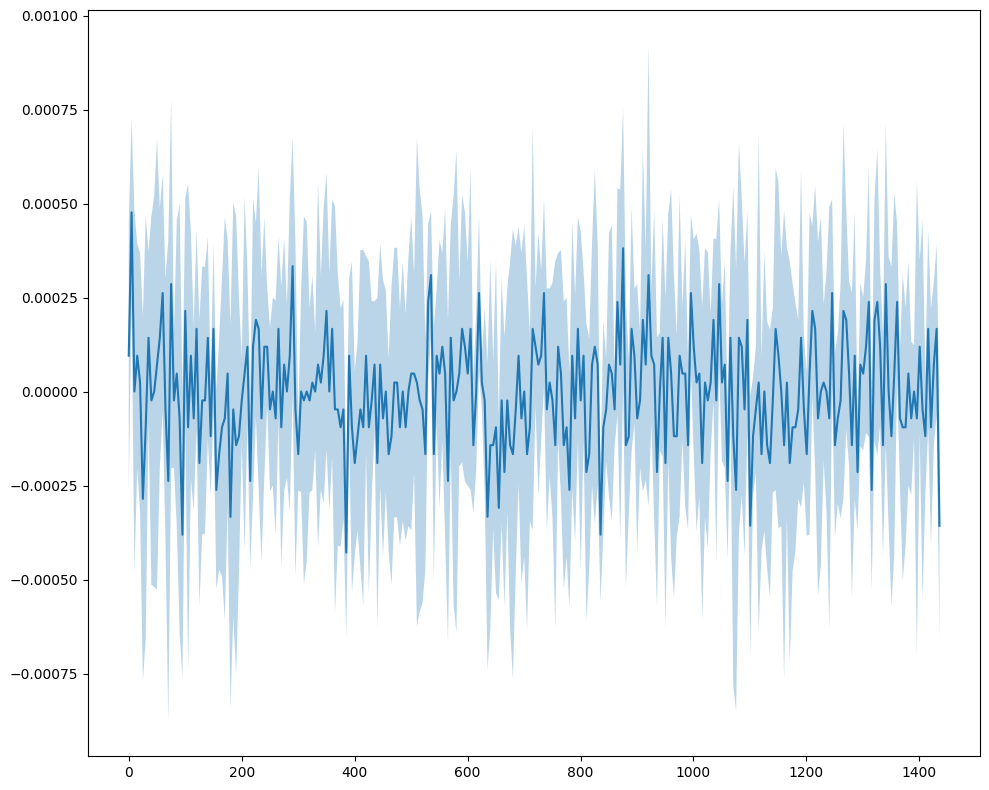

In [52]:
# Plot
fig = plt.figure(figsize=(10,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : 'tab:blue', 
                       'pSC101': 'tab:orange', 
                       'pBBR1': 'purple',
                       'p15A': 'tab:green', 
                       'pUC': 'tab:red'}

idx = 2
counter = 0
for m_idx, medium_x in enumerate(summary_decryption_list[idx].media.unique()):
    print(alpha_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].media == medium_x)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_FI_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        print(current_sample_name, current_sample_ID)
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        if any([current_sample_name == 'p15A']): # current_sample_name == 'pBBR1'
            print( media_colours[s_idx])
            ax1.plot(x, y, label=f"{current_sample_ID} - {medium_x}", alpha=alpha_[m_idx], color = media_colours[counter], linewidth=3) # color=standard_mpl_colors[current_sample_name],
            # if m_idx==0:
            #     ax1.plot(x, y, label=f"{current_sample_ID}", color=standard_mpl_colors[current_sample_name], alpha=alpha_[m_idx]) 
            # else:
            #      ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[m_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.1, color = media_colours[counter])#, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])
            counter += 1
        if any([current_sample_name == 'NCC']): # current_sample_name == 'pBBR1'
            if m_idx==0:
                ax1.plot(x, y, label=f"{current_sample_name}", color='tab:blue', alpha=alpha_[m_idx]) 
            else:
                 ax1.plot(x, y, color='tab:blue', alpha=alpha_[m_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.3)#, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])


plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("F.I. (normalised units)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,25))
ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
ax1.set_ylim([-0.1,4.5])
plt.legend(prop={'size': 19,'weight':'bold'},loc='upper left') 

plt.savefig(f"FI_vs_media.png", dpi=300)
plt.show();
plt.close();

In [ ]:
summary_decryption_list[idx].host.unique()#.loc[summary_decryption_list[idx]]#.media == medium_x)]

### hosts

In [53]:
alpha_ = list(np.arange(1,0.1,-0.31))
alpha_

[1.0, 0.69, 0.3799999999999999]

In [54]:
sns.color_palette("Purples_r",5)


[(0.3568166089965398, 0.20525951557093425, 0.5856978085351787),
 (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 (0.6214532871972318, 0.606074586697424, 0.7855440215301807),
 (0.7764705882352941, 0.7790849673202614, 0.8823529411764706),
 (0.9110957324106113, 0.9057439446366782, 0.9483275663206459)]

4
NC DH5a|just_cells|EZRDM|0ug|0
pSC101 pSC101
pBBR1 pBBR1
p15A p15A
pUC pUC
4
NC DE344|just_cells|EZRDM|0ug|0
pSC101 pSC101
pBBR1 pBBR1
p15A p15A
pUC pUC


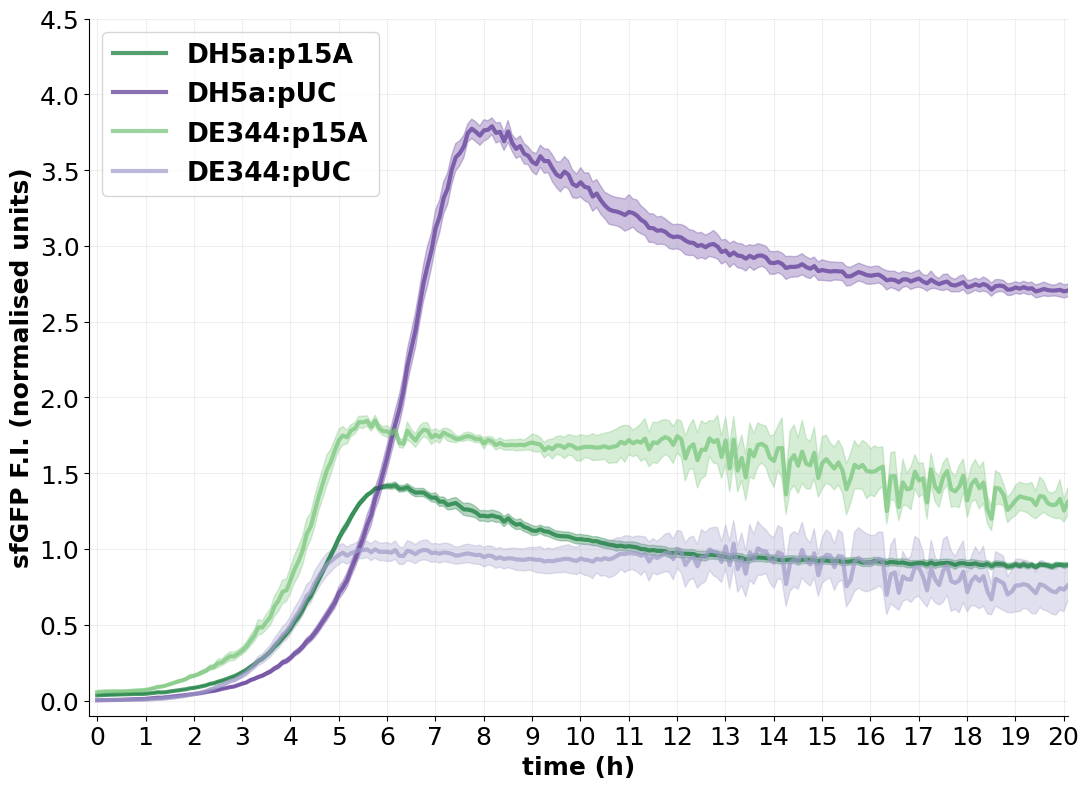

In [55]:
# Plot
fig = plt.figure(figsize=(11,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : 'tab:blue', 
                       'pSC101': [sns.color_palette("Oranges_r",5)[0],sns.color_palette("Oranges_r",5)[2]], 
                       'pBBR1': 'purple',
                       'p15A': [sns.color_palette("Greens_r",5)[0],sns.color_palette("Greens_r",5)[2]], 
                       'pUC': [sns.color_palette("Purples_r",5)[0],sns.color_palette("Purples_r",5)[2]]}

idx = 3
for s_idx, sample_x in enumerate(['DH5a', 'DE344'][:]):
    print(alpha_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].host == sample_x)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_FI_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        print(current_sample_name, current_sample_ID)
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        if any([current_sample_name == 'p15A', current_sample_name == 'pUC']): # current_sample_name == 'pBBR1'
            ax1.plot(x, y, label=f"{sample_x}:{current_sample_ID}", alpha=0.7, linewidth=3, color=standard_mpl_colors[current_sample_name][s_idx])
            # if m_idx==0:
            #     ax1.plot(x, y, label=f"{current_sample_ID}", color=standard_mpl_colors[current_sample_name], alpha=alpha_[m_idx]) 
            # else:
            #      ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[m_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.3, color=standard_mpl_colors[current_sample_name][s_idx])#, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])
        if any([current_sample_name == 'NCC']): # current_sample_name == 'pBBR1'
            if s_idx==0:
                ax1.plot(x, y, label=f"{current_sample_name}", color='tab:blue', alpha=1) 
            else:
                 ax1.plot(x, y, color='tab:blue', alpha=alpha_[m_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.3)#, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])


plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("sfGFP F.I. (normalised units)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,25))
ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
ax1.set_ylim([-0.1,4.5])
plt.legend(prop={'size': 19,'weight':'bold'},loc='upper left') 

# plt.savefig(f"FI_vs_hosts_ALL.png", dpi=300)
plt.show();
plt.close();

In [56]:
popt[1]
y.index[y.index > popt[1]][0]

230.11666666666667

In [57]:
y[y.index > popt[1]].iloc[0]

0.4329244847134899

0
xdata_fit 390.1666666666667
xdata_fit 1150.55
xdata_fit 440.2
xdata_fit 440.2
xdata_fit 440.2
xdata_fit 925.4333333333333


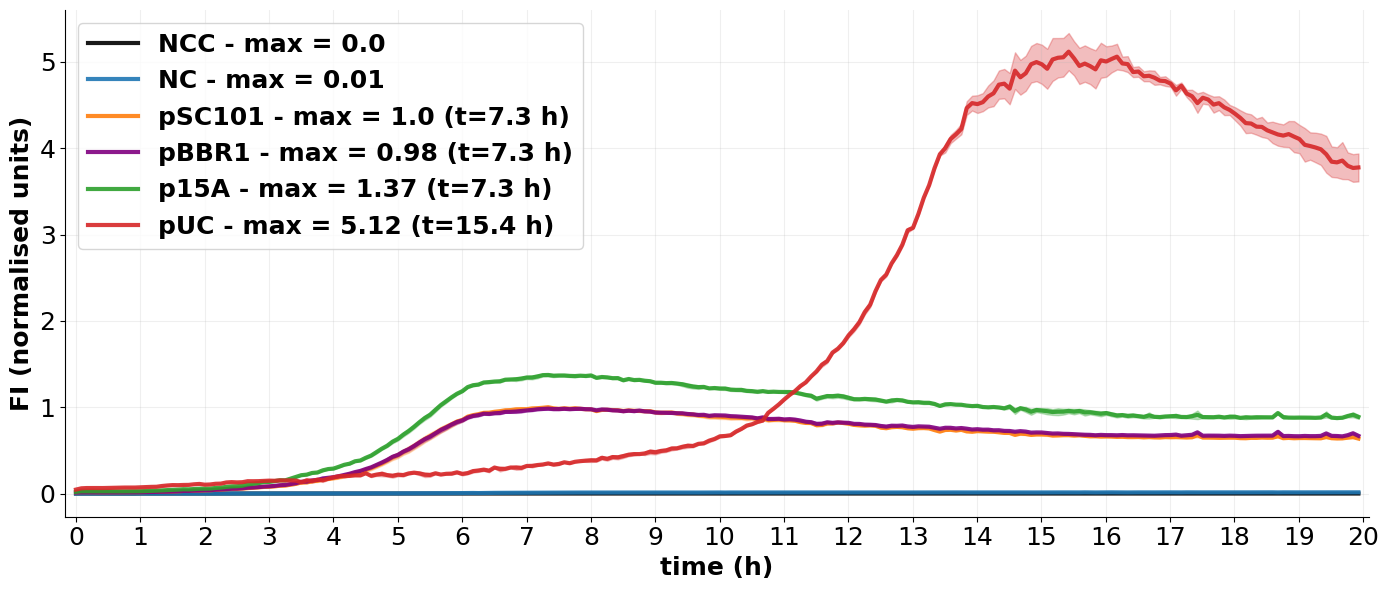

In [58]:
# Plot
fig = plt.figure(figsize=(14,6), tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : 'tab:blue', 
                       'pSC101': 'tab:orange', 
                       'pBBR1': 'purple',
                       'p15A': 'tab:green', 
                       'pUC': 'tab:red'}
alpha_ = list(np.arange(1,0.1,-0.21))
idx = 0
for alpha_x, abx_ in enumerate([0]): #,25,50,75,100
    print(alpha_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].abx_c == abx_)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_FI_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        xdata_fit_death = y[y.idxmax():].index
        ydata_fit_death = y[y.idxmax():]
        print(f"xdata_fit {xdata_fit[-1]}")
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # if any([current_sample_name == 'pSC101', current_sample_name == 'pBBR1']):
        if dx > 1:
            ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=0.9, linewidth=3, label=f"{current_sample_name} - max = {round(y.max(),2)} (t={round(y.idxmax()/60,1)} h)") 
        else:
            #ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[alpha_x], linewidth=3) 
            ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=0.9, linewidth=3, label=f"{current_sample_name} - max = {round(y.max(),2)}") 
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.3, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])
        # Curve fit (excluding medium negative control)
        # if dx > -1:
        #     p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
        #     popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        #     print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
        #     # save fitted curve stats
        #     # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        #     # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        #     # popt_list.append(popt)
        #     ax1.plot(x[:len(xdata_fit)], sigmoid(x, *popt)[:len(xdata_fit)], label=f"{current_sample_name}", color=standard_mpl_colors[current_sample_name])
        #     y_dot = sigmoid(popt[1], *popt)
        #     # ax1.plot(popt[1],y_dot,'o', color=standard_mpl_colors[current_sample_name], markersize=10, alpha=0.5)
        #     # ax1.hlines(popt[0], 0, 1205, color=standard_mpl_colors[current_sample_name], linestyle ='--', alpha=0.5)
        #     p0_death = [max(ydata_fit_death), np.median(xdata_fit_death),1,min(ydata_fit_death)] # this is an mandatory initial guess
        #     popt_death, pcov_death = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0)#, method='lm')
        #     # ax1.plot(x[len(xdata_fit):], sigmoid(x, *popt_death)[len(xdata_fit):], label=f"$t_{'D'}$={round(np.log(2)/p0_death[2],1)}min", color=standard_mpl_colors[current_sample_name])
            
#- IP:{round(popt[1],1)}min 

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("FI (normalised units)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,21))
# ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
# ax1.set_ylim([-0.3,6.55])
# ax1.set_xlim([-1,60])
# ax1.set_ylim([-0.004,0.08])
plt.legend(prop={'size': 18,'weight':'bold'},loc='upper left')#,bbox_to_anchor=(-.1, 2.2)) 

# plt.savefig(f"FI_showcase_0.png", dpi=300)
plt.show();
plt.close();

---
# OD Analysis

### Overview

0
xdata_fit 35.016666666666666
NCC
 - popt[0] = 241.99857604579176
 - popt[1] = -46.33341078895878
 - popt[2] = 0.17173698083828054
 - popt[3] = -241.94669584811533
xdata_fit 465.23333333333335
NC
 - popt[0] = 1.5734650000520918
 - popt[1] = 321.05485257121006
 - popt[2] = 0.01461829874782506
 - popt[3] = -0.040515255772219955
xdata_fit 690.35
pJUMP47-2A(pSC101)
 - popt[0] = 0.9999999989477039
 - popt[1] = 306.7080821947388
 - popt[2] = 0.02287954157567214
 - popt[3] = 0.035931737654021544
xdata_fit 710.35
pJUMP43-2A(pBBR1)
 - popt[0] = 1.159865652049464
 - popt[1] = 320.5750796498131
 - popt[2] = 0.023413972505855363
 - popt[3] = -0.010340696721102388
xdata_fit 690.35
pJUMP46-2A(p15A)
 - popt[0] = 1.0703450945718698
 - popt[1] = 322.2568821085643
 - popt[2] = 0.020653801973952956
 - popt[3] = 0.03577053893054454
xdata_fit 790.4
pJUMP48-2A(pUC)
 - popt[0] = 2.246702783836777
 - popt[1] = 491.7550891564075
 - popt[2] = 0.011998794911000164
 - popt[3] = 0.00290209570542945


/Users/camillomoschner/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/anaconda3/envs/ia-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters coul

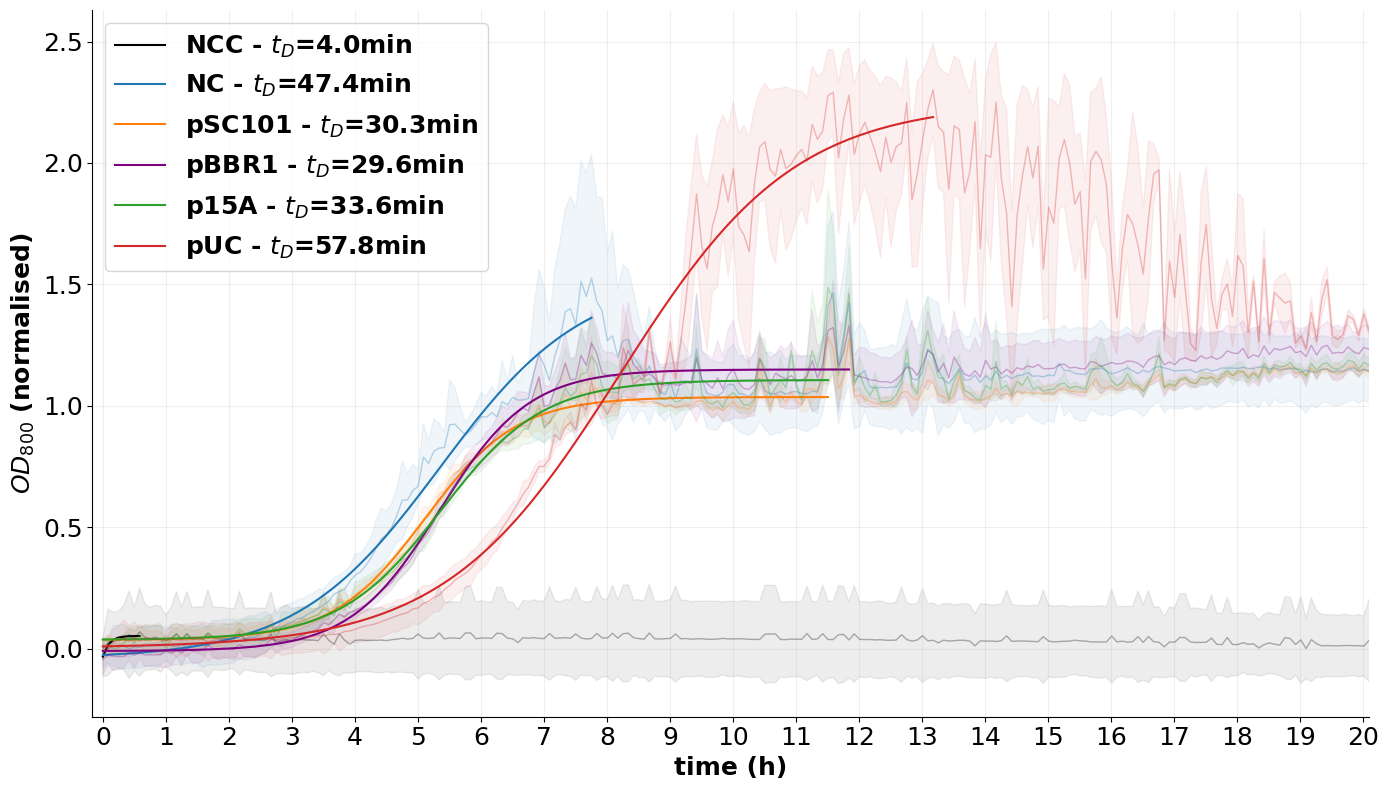

In [59]:
# Plot
fig = plt.figure(figsize=(14,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : 'tab:blue', 
                       'pSC101': 'tab:orange', 
                       'pBBR1': 'purple',
                       'p15A': 'tab:green', 
                       'pUC': 'tab:red'}
alpha_ = list(np.arange(1,0.1,-0.21))
idx = 0
for alpha_x, abx_ in enumerate([0]): #,25,50,75,100
    print(alpha_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].abx_c == abx_)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_OD_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        xdata_fit_death = y[y.idxmax():].index
        ydata_fit_death = y[y.idxmax():]
        print(f"xdata_fit {xdata_fit[-1]}")
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # if any([current_sample_name == 'pSC101', current_sample_name == 'pBBR1']):
        if alpha_x==0:
            ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=0.3, linewidth=1) 
        else:
             ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[alpha_x]) 
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.07, color=standard_mpl_colors[current_sample_name])#, alpha=alpha_[alpha_x])
        # Curve fit (excluding medium negative control)
        if dx > -1:
            p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
            popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
            print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
            # save fitted curve stats
            # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
            # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
            # popt_list.append(popt)
            ax1.plot(x[:len(xdata_fit)], sigmoid(x, *popt)[:len(xdata_fit)], label=f"{current_sample_name} - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=standard_mpl_colors[current_sample_name])
            y_dot = sigmoid(popt[1], *popt)
            # ax1.plot(popt[1],y_dot,'o', color=standard_mpl_colors[current_sample_name], markersize=10, alpha=0.5)
            # ax1.hlines(popt[0], 0, 1205, color=standard_mpl_colors[current_sample_name], linestyle ='--', alpha=0.5)
            p0_death = [max(ydata_fit_death), np.median(xdata_fit_death),1,min(ydata_fit_death)] # this is an mandatory initial guess
            popt_death, pcov_death = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0)#, method='lm')
            # ax1.plot(x[len(xdata_fit):], sigmoid(x, *popt_death)[len(xdata_fit):], label=f"$t_{'D'}$={round(np.log(2)/p0_death[2],1)}min", color=standard_mpl_colors[current_sample_name])
            
#- IP:{round(popt[1],1)}min 

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("$OD_{800}$ (normalised)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,25))
# ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
# ax1.set_ylim([-0.3,6.55])
# ax1.set_xlim([-1,60])
# ax1.set_ylim([-0.004,0.08])
plt.legend(prop={'size': 18,'weight':'bold'},loc='upper left')#,bbox_to_anchor=(-.1, 2.2)) 

# plt.savefig(f"OD_master-1.png", dpi=300)
plt.show();
plt.close();

Estimated parameters: L1=69.8525743454781, k1=0.1753801900730051, x01=44.250630818904234, L2=2.0666674444567316e-11, k2=37.52370342163013, x02=3.2472985539715366e-10, b=14.505411071621904, delay=3.247298527747132e-10


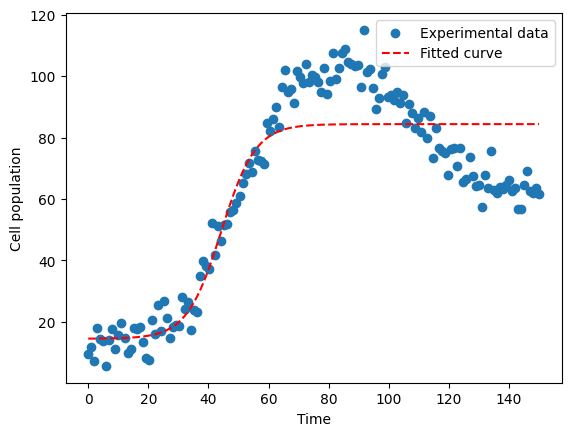

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the combined logistic function with a delay parameter
def combined_logistic_delay(x, L1, k1, x01, L2, k2, x02, b, delay):
    return (L1 / (1 + np.exp(-k1 * (x - x01)))) - (L2 / (1 + np.exp(-k2 * (x - (x02 + delay))))) + b

# Simulate some experimental data (replace this with your actual data)
time = np.linspace(0, 150, 150)
cell_population = combined_logistic_delay(time, 100, 0.1, 50, 50, 0.1, 80, 10, 30)
noise = np.random.normal(0, 5, cell_population.shape)
experimental_data = cell_population + noise

# Fit the experimental data to the combined logistic function with delay
popt, pcov = curve_fit(combined_logistic_delay, time, experimental_data, bounds=(0, np.inf))

# Print the estimated parameters
print(f"Estimated parameters: L1={popt[0]}, k1={popt[1]}, x01={popt[2]}, L2={popt[3]}, k2={popt[4]}, x02={popt[5]}, b={popt[6]}, delay={popt[7]}")

# Plot the experimental data and the fitted curve
plt.scatter(time, experimental_data, label="Experimental data")
plt.plot(time, combined_logistic_delay(time, *popt), 'r--', label="Fitted curve")
plt.xlabel("Time")
plt.ylabel("Cell population")
plt.legend()
plt.show()


Estimated parameters: L1=-34.14610893732211, k1=-163.29736095912384, x01=-39.99884646670461, L2=-37.25634809443446, k2=18.20621308830736, x02=-10.36255954658388, b=12.454578726205277


/var/folders/p_/d1kqy0fj5497sqkd5nkn_rf40000gn/T/ipykernel_33159/1900035238.py:7: RuntimeWarning: overflow encountered in exp
  return (L1 / (1 + np.exp(-k1 * (x - x01)))) - (L2 / (1 + np.exp(-k2 * (x - x02)))) + b


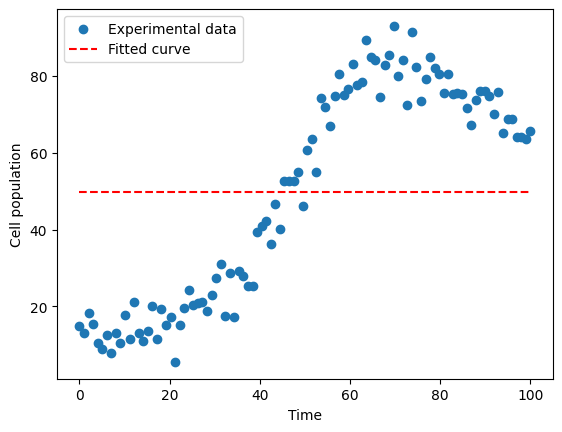

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the combined logistic function
def combined_logistic(x, L1, k1, x01, L2, k2, x02, b):
    return (L1 / (1 + np.exp(-k1 * (x - x01)))) - (L2 / (1 + np.exp(-k2 * (x - x02)))) + b

# Simulate some experimental data (replace this with your actual data)
time = np.linspace(0, 100, 100)
cell_population = combined_logistic(time, 100, 0.1, 50, 50, 0.1, 80, 10)
noise = np.random.normal(0, 5, cell_population.shape)
experimental_data = cell_population + noise

# Fit the experimental data to the combined logistic function
popt, pcov = curve_fit(combined_logistic, time, experimental_data)

# Print the estimated parameters
print(f"Estimated parameters: L1={popt[0]}, k1={popt[1]}, x01={popt[2]}, L2={popt[3]}, k2={popt[4]}, x02={popt[5]}, b={popt[6]}")

# Plot the experimental data and the fitted curve
plt.scatter(time, experimental_data, label="Experimental data")
plt.plot(time, combined_logistic(time, *popt), 'r--', label="Fitted curve")
plt.xlabel("Time")
plt.ylabel("Cell population")
plt.legend()
plt.show()


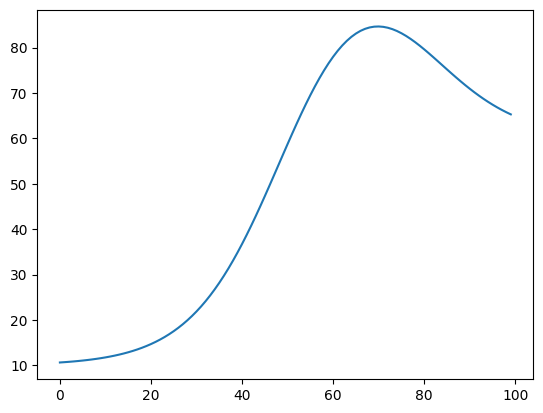

In [62]:
plt.plot(cell_population)

## PyTorch DIY logistic regeression nn

In [1]:
import torch # Create linear regression model class
from torch import nn
import numpy as np

### 1 - data (prepare and load)

In [2]:
# Define the combined logistic function with a delay parameter
def combined_logistic_delay(x, L1, k1, x01, L2, k2, x02, b, delay):
    return (L1 / (1 + np.exp(-k1 * (x - x01)))) - (L2 / (1 + np.exp(-k2 * (x - (x02 + delay))))) + b


def combined_logistic_delay(x, L1, k1, x01, b):
    return (L1 / (1 + np.exp(-k1 * (x - x01)))) +b #- (L2 / (1 + np.exp(-k2 * (x - (x02 + delay))))) + b
# Simulate some experimental data (replace this with your actual data)
X = torch.arange(0, 150, 1).unsqueeze(dim=1) # time

# cell_population = combined_logistic_delay(X, 100, 0.1, 50, 50, 0.1, 80, 10, 30)
cell_population = combined_logistic_delay(X, 100, 0.1, 50, 10)
noise = np.random.normal(0, 8, cell_population.shape)

y = cell_population + noise # experimental_data

In [3]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [4]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test darta and compares predictions.
    """
    # Plot train data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    # Plot train data in blue
    plt.scatter(test_data, test_labels, color='g', s=4, label='Test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, color='r',s=4, label="Predictions")
    plt.legend(prop={"size":14})

### 2 - build model

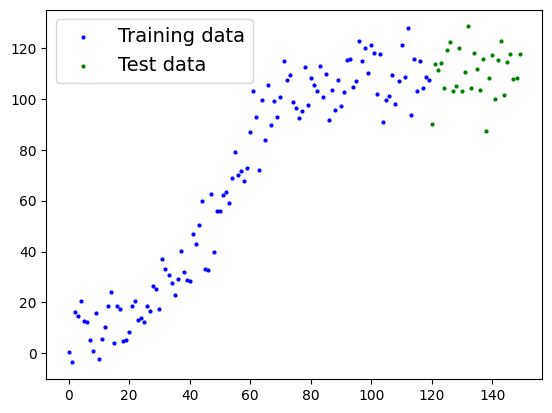

In [5]:
plot_predictions()

  - y(x): The dependent variable (e.g., cell population size)
  - L1: The first logistic function's maximum value, representing the carrying capacity (first maximal steady state)
  - k1: The steepness of the growth phase
  - x: The independent variable (e.g., time)
  - x01: The x-value of the growth phase sigmoid's midpoint (i.e., the point of maximum growth rate)
  - L2: The second logistic function's maximum value, representing the decline from the carrying capacity down to the new steady state (death phase steady state)
  - k2: The steepness of the decline phase
  - x02: The x-value of the decline phase sigmoid's midpoint (i.e., the point of maximum decline rate)
  - b: The y-offset, which represents the curve's minimum value (starting point)

In [6]:
class CombinedLogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.L1 = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.k1 = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        self.x01 = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # self.L2 = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True,
        #                                      dtype=torch.float))
        # self.k2 = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True,
        #                                      dtype=torch.float))
        # self.x02 = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True,
        #                                      dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # self.delay = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True,
        #                                      dtype=torch.float))
    # forward() defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return (self.L1 / (1 + torch.exp(-self.k1 * (x - self.x01)))) + self.b# - (self.L2 / (1 + torch.exp(-self.k2 * (x - (self.x02 + self.delay))))) + self.b


In [7]:
# Create a random seed
# torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = CombinedLogisticRegressionModel()

# Check out the parameters
print(list(model_0.parameters()))

# Make predictions with model
with torch.inference_mode(): # "Context manager" !
    y_preds = model_0(X_test)

y_preds

[Parameter containing:
tensor([0.7078], requires_grad=True), Parameter containing:
tensor([-0.3675], requires_grad=True), Parameter containing:
tensor([-1.2687], requires_grad=True), Parameter containing:
tensor([2.1793], requires_grad=True)]


tensor([[2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793],
        [2.1793]])

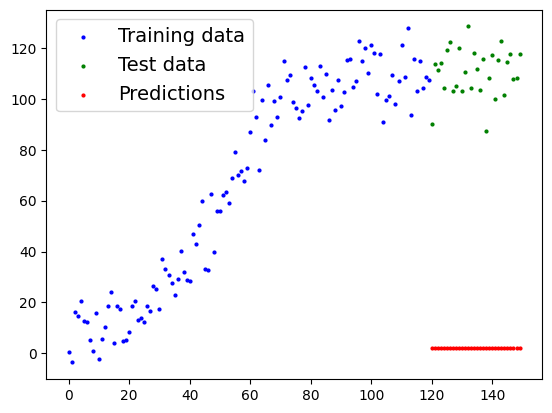

In [8]:
plot_predictions(predictions=y_preds)

### 3 - Training

#### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calcualte the gradients of each of the parameters (**backpropagation**) of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [9]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer_fn = torch.optim.SGD(params=model_0.parameters(),
                               lr=0.005) # lr = learnin rate = possibly the most important hyperparameter you can set

In [10]:
from math import modf
# An epoch is one loop through the data... (this is a hyperparameter because we've set it)
epochs = 200_000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    # 1. Forward Pass
    y_pred = model_0(X_train)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # 3. Zero the gradients of the optimiser (they accumulate by default)
    optimizer_fn.zero_grad()
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    # 5. Step the optimizer (perform gradient descent)
    optimizer_fn.step() # by default how the optimizer changes will accumulate throug the loop so... we have to zero them above in step 3 for 
    # Testing
    model_0.eval() # turns of gradient tracking
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scences
        # 1. Test forward pass
        test_pred = model_0(X_test)
        # 2. Test calculate the loss
        test_loss = loss_fn(test_pred, y_test)

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
    if epoch % 10000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test: {test_loss} ")
        print(model_0.state_dict())

  #print(f"{epoch}\nLoss: {loss}")
    #print(model_0.state_dict())

Epoch: 0 | Loss: 65.31376520092597 | Test: 108.41665882258819 
OrderedDict([('L1', tensor([0.7078])), ('k1', tensor([-0.3675])), ('x01', tensor([-1.2687])), ('b', tensor([2.1840]))])
Epoch: 10000 | Loss: 45.50848412315041 | Test: 78.19739884524749 
OrderedDict([('L1', tensor([0.4168])), ('k1', tensor([-0.6627])), ('x01', tensor([-1.3235])), ('b', tensor([32.4033]))])
Epoch: 20000 | Loss: nan | Test: nan 
OrderedDict([('L1', tensor([nan])), ('k1', tensor([nan])), ('x01', tensor([nan])), ('b', tensor([38.1877]))])
Epoch: 30000 | Loss: nan | Test: nan 
OrderedDict([('L1', tensor([nan])), ('k1', tensor([nan])), ('x01', tensor([nan])), ('b', tensor([38.1877]))])
Epoch: 40000 | Loss: nan | Test: nan 
OrderedDict([('L1', tensor([nan])), ('k1', tensor([nan])), ('x01', tensor([nan])), ('b', tensor([38.1877]))])
Epoch: 50000 | Loss: nan | Test: nan 
OrderedDict([('L1', tensor([nan])), ('k1', tensor([nan])), ('x01', tensor([nan])), ('b', tensor([38.1877]))])
Epoch: 60000 | Loss: nan | Test: nan 


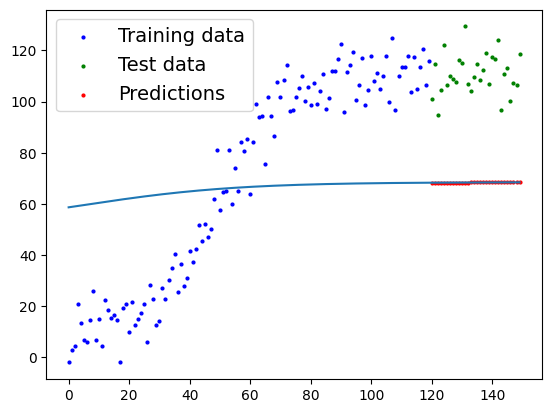

In [120]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    tensor1 = model_0(X).detach().numpy()
plt.plot(tensor1)
plot_predictions(predictions=y_preds_new)

In [117]:

def combined_logistic_delay(x, L1, k1, x01, b):
    return (L1 / (1 + np.exp(-k1 * (x - x01)))) +b #- (L2 / (1 + np.exp(-k2 * (x - (x02 + delay))))) + b
# Simulate some experimental data (replace this with your actual data)
X = torch.arange(0, 150, 1).unsqueeze(dim=1) # time

# cell_population = combined_logistic_delay(X, 100, 0.1, 50, 50, 0.1, 80, 10, 30)
cell_population = combined_logistic_delay(X, 100, 0.1, 50, 10)


In [118]:
model_0.state_dict()

OrderedDict([('L1', tensor([-0.8588])),
             ('k1', tensor([-0.4168])),
             ('x01', tensor([0.3891])),
             ('b', tensor([16.5448]))])

### 4 - Inference

In [ ]:
# Make predictions with model
with torch.inference_mode(): # "Context manager" !
  y_preds = model_0(X_test)

y_preds

---

In [629]:
sns.color_palette("plasma",5)[3]
t1_just_constructs_at_c0.samples.unique()

array(['NCC', 'NC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP48-2A(pUC)'], dtype=object)

### media

EZRDM
xdata_fit 185.08333333333334
xdata_fit 555.2666666666667
xdata_fit 555.2666666666667
xdata_fit 555.2666666666667
xdata_fit 510.25
xdata_fit 555.2666666666667
LB
xdata_fit 10.0
xdata_fit 1435.6666666666667
xdata_fit 1435.6666666666667
xdata_fit 1435.6666666666667
xdata_fit 1435.6666666666667
xdata_fit 1425.6666666666667
TB
xdata_fit 0.0
xdata_fit 1435.6666666666667
xdata_fit 1435.6666666666667
xdata_fit 1410.6666666666667
xdata_fit 1410.6666666666667
xdata_fit 870.4166666666666


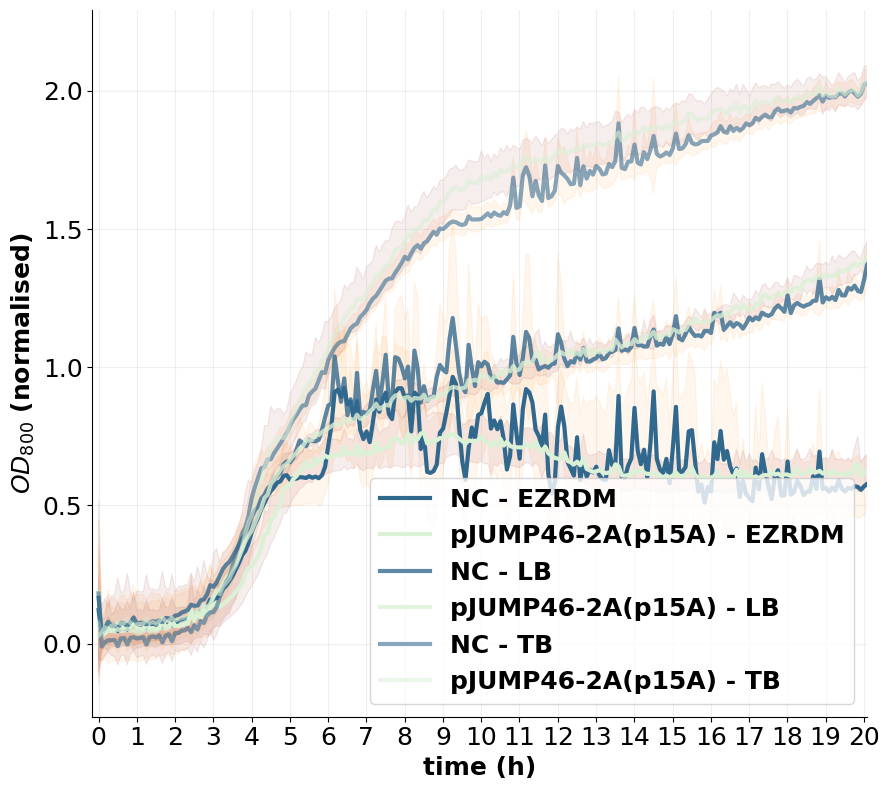

In [635]:
# Plot
fig = plt.figure(figsize=(9,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : sns.color_palette("viridis",5), 
                       'pSC101': [sns.color_palette("Oranges_r",5)[0],sns.color_palette("Oranges_r",5)[2]], 
                       'pBBR1': 'purple',
                       'p15A': sns.color_palette("Greens_r",5), #[sns.color_palette("Greens_r",5)[0],sns.color_palette("Greens_r",5)[2]], 
                       'pUC': [sns.color_palette("Purples_r",5)[0],sns.color_palette("Purples_r",5)[2]]}

alpha_ = list(np.arange(1,0.1,-0.21))
idx = 2
for m_idx, medium_x in enumerate(summary_decryption_list[idx].media.unique()):
    counter = 0
    print(medium_x)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].media == medium_x)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_OD_list_norm[idx][constr_indices]
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        xdata_fit_death = y[y.idxmax():].index
        ydata_fit_death = y[y.idxmax():]
        print(f"xdata_fit {xdata_fit[-1]}")
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # if any([current_sample_name == 'pSC101', current_sample_name == 'pBBR1']):
        if any([current_sample_name == 'NC', current_sample_name == 'p15A']): # current_sample_name == 'NC',current_sample_name == 'pSC101', 
            ax1.plot(x, y, alpha=alpha_[m_idx], color = standard_mpl_colors[current_sample_name][dx] , linewidth=3, label=f"{constr} - {medium_x}")  # media_colours[counter]
        # else:
        #      ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[s_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.07, color=media_colours[counter])#, alpha=alpha_[alpha_x])
            # Curve fit (excluding medium negative control)
            # if dx > -1:
            #     p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
            #     popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
            #     print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
            #     # save fitted curve stats
            #     # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
            #     # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
            #     # popt_list.append(popt)
            #     ax1.plot(x[:], sigmoid(x, *popt)[:], label=f"{current_sample_name} - {medium_x} - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=media_colours[counter])
            #     y_dot = sigmoid(popt[1], *popt)
            #     # ax1.plot(popt[1],y_dot,'o', color=standard_mpl_colors[current_sample_name], markersize=10, alpha=0.5)
            #     # ax1.hlines(popt[0], 0, 1205, color=standard_mpl_colors[current_sample_name], linestyle ='--', alpha=0.5)
            #     p0_death = [max(ydata_fit_death), np.median(xdata_fit_death),1,min(ydata_fit_death)] # this is an mandatory initial guess
            #     popt_death, pcov_death = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0)#, method='lm')
            counter += 1
            # ax1.plot(x[len(xdata_fit):], sigmoid(x, *popt_death)[len(xdata_fit):], label=f"$t_{'D'}$={round(np.log(2)/p0_death[2],1)}min", color=standard_mpl_colors[current_sample_name])
            
#- IP:{round(popt[1],1)}min 

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("$OD_{800}$ (normalised)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,25))
# ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
# ax1.set_ylim([-0.3,6.55])
# ax1.set_xlim([-1,60])
# ax1.set_ylim([-0.004,0.08])
plt.legend(prop={'size': 18,'weight':'bold'})#,loc='center right')#,bbox_to_anchor=(-.1, 2.2)) 

# plt.savefig(f"OD_vs_hosts.png", dpi=300)
plt.show();
plt.close();

### hosts

In [571]:
t1_just_constructs_at_c0

cells   host             samples  media  abx_c  replicate  \
G01     y  DE344                  NC  EZRDM      0          0   
H01     y  DE344                  NC  EZRDM      0          1   
A02     y  DE344                  NC  EZRDM      0          2   
B02     y  DE344                  NC  EZRDM      0          3   
C02     y  DE344                  NC  EZRDM      0          4   
D02     y  DE344                  NC  EZRDM      0          5   
C03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          0   
D03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          1   
E03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          2   
F03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          3   
G03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          4   
H03     y  DE344  pJUMP47-2A(pSC101)  EZRDM     40          5   
A04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          0   
B04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          1   
C04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          2   
D04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          3   
E04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          4   
F04     y  DE344   pJUMP43-2A(pBBR1)  EZRDM     40          5   
G04     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          0   
H04     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          1   
A05     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          2   
B05     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          3   
C05     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          4   
D05     y  DE344    pJUMP46-2A(p15A)  EZRDM     40          5   
A07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          0   
B07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          1   
C07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          2   
D07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          3   
E07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          4   
F07     y  DE344     pJUMP48-2A(pUC)  EZRDM     40          5   

                    sample_ID    media_ID  \
G01          DE344|just_cells   EZRDM|0ug   
H01          DE344|just_cells   EZRDM|0ug   
A02          DE344|just_cells   EZRDM|0ug   
B02          DE344|just_cells   EZRDM|0ug   
C02          DE344|just_cells   EZRDM|0ug   
D02          DE344|just_cells   EZRDM|0ug   
C03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
D03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
E03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
F03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
G03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
H03  DE344|pJUMP47-2A(pSC101)  EZRDM|40ug   
A04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
B04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
C04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
D04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
E04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
F04   DE344|pJUMP43-2A(pBBR1)  EZRDM|40ug   
G04    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
H04    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
A05    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
B05    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
C05    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
D05    DE344|pJUMP46-2A(p15A)  EZRDM|40ug   
A07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   
B07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   
C07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   
D07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   
E07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   
F07     DE344|pJUMP48-2A(pUC)  EZRDM|40ug   

                                        ID  \
G01           DE344|just_cells|EZRDM|0ug|0   
H01           DE344|just_cells|EZRDM|0ug|1   
A02           DE344|just_cells|EZRDM|0ug|2   
B02           DE344|just_cells|EZRDM|0ug|3   
C02           DE344|just_cells|EZRDM|0ug|4   
D02           DE344|just_cells|EZRDM|0ug|5   
C03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug|0   
D03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug|1   
E03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug|2   
F03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug|3   
G03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug|4   
H03  DE344|pJUMP47-2A(pSC101)|EZRDM|40ug

0
xdata_fit 510.26666666666665
NC
 - popt[0] = 1.0702512419294559
 - popt[1] = 269.64698677404374
 - popt[2] = 0.026149834530315087
 - popt[3] = 0.024093233853846114
xdata_fit 510.26666666666665
pJUMP47-2A(pSC101)
 - popt[0] = 1.1374500341581093
 - popt[1] = 272.2125597114717
 - popt[2] = 0.02614516700248313
 - popt[3] = -0.00784885371733099
xdata_fit 510.26666666666665
xdata_fit 490.25
pJUMP46-2A(p15A)
 - popt[0] = 1.052240469507139
 - popt[1] = 270.4776444630109
 - popt[2] = 0.028294179573554405
 - popt[3] = 0.0130690092610524
xdata_fit 665.3333333333334
pJUMP48-2A(pUC)
 - popt[0] = 1.2483796755810344
 - popt[1] = 385.1753419227608
 - popt[2] = 0.023207587428790397
 - popt[3] = 0.015904539396077232
1
xdata_fit 1315.6666666666667
NC
 - popt[0] = 1.0091602781790692
 - popt[1] = 208.4745869643216
 - popt[2] = 0.03745205748953922
 - popt[3] = 0.01494797649245016
xdata_fit 1265.6333333333334
pJUMP47-2A(pSC101)
 - popt[0] = 1.0148062471507424
 - popt[1] = 225.49976484855796
 - popt[2] = 0.

/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packag

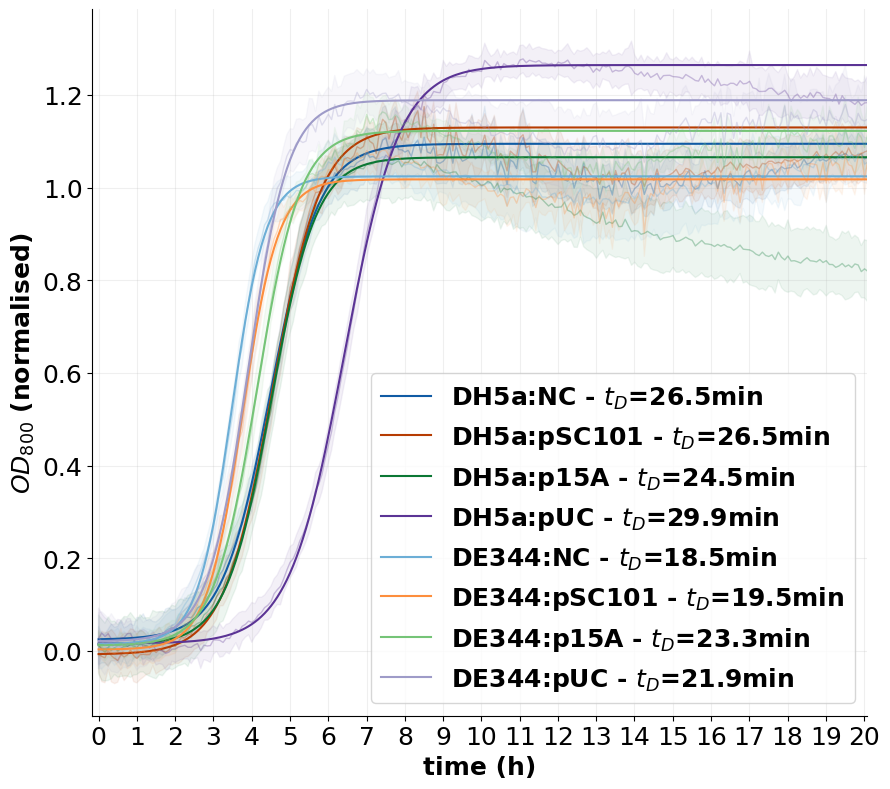

In [607]:
# Plot
fig = plt.figure(figsize=(9,8), constrained_layout=True, tight_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
ax1= fig.add_subplot(gs[0,0])
standard_mpl_colors = {'NCC': 'black',
                       'NC' : [sns.color_palette("Blues_r",5)[0],sns.color_palette("Blues_r",5)[2]], 
                       'pSC101': [sns.color_palette("Oranges_r",5)[0],sns.color_palette("Oranges_r",5)[2]], 
                       'pBBR1': 'purple',
                       'p15A': [sns.color_palette("Greens_r",5)[0],sns.color_palette("Greens_r",5)[2]], 
                       'pUC': [sns.color_palette("Purples_r",5)[0],sns.color_palette("Purples_r",5)[2]]}

alpha_ = list(np.arange(1,0.1,-0.21))
idx = 3
for s_idx, sample_x in enumerate(['DH5a', 'DE344'][:]):
    print(s_idx)
    # Dictionary by sample
    t1_just_constructs_at_c0 = summary_decryption_list[idx].loc[(summary_decryption_list[idx].host == sample_x)]
    FI_data_by_construct_dict = {}
    for constr in t1_just_constructs_at_c0.samples.unique():
        constr_indices =  t1_just_constructs_at_c0.loc[t1_just_constructs_at_c0.samples == constr].index
        FI_data_by_construct_dict[constr] = summary_OD_list_norm[idx][constr_indices]
    
    test_df = t1_just_constructs_at_c0
    for dx, constr in enumerate(t1_just_constructs_at_c0.samples.unique()):
        # run_replicate_wells = FI_data_by_construct_dict[constr].columns
        replicate_no = 3
        df = FI_data_by_construct_dict[constr]
        x= df.index
        y= df.mean(axis=1)
        xdata_fit = y[:y.idxmax()].index
        ydata_fit = y[:y.idxmax()]
        xdata_fit_death = y[y.idxmax():].index
        ydata_fit_death = y[y.idxmax():]
        print(f"xdata_fit {xdata_fit[-1]}")
        variance_per_timepoint = df.var(axis=1)
        current_sample_name = summary_decryption_list[idx].loc[df.columns[0],'samples'].split('(')[-1].split(')')[0]
        current_sample_ID = summary_decryption_list[idx].loc[df.columns[0],'ID'].split('(')[-1].split(')')[0]
        # 1- average line plot
        # sns.lineplot(ax = ax1,
        #              data = y, label=f"{current_sample_ID}", alpha=0.9, color=standard_mpl_colors[current_sample_name]) 
        # if any([current_sample_name == 'pSC101', current_sample_name == 'pBBR1']):
        if any([current_sample_name == 'NC',current_sample_name == 'pSC101', current_sample_name == 'p15A', current_sample_name == 'pUC']):
            ax1.plot(x, y, color=standard_mpl_colors[current_sample_name][s_idx], alpha=0.3, linewidth=1) 
        # else:
        #      ax1.plot(x, y, color=standard_mpl_colors[current_sample_name], alpha=alpha_[s_idx]) 
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.07, color=standard_mpl_colors[current_sample_name][s_idx])#, alpha=alpha_[alpha_x])
            # Curve fit (excluding medium negative control)
            if dx > -1:
                p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
                popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
                print(f"{constr}\n - popt[0] = {popt[0]}\n - popt[1] = {popt[1]}\n - popt[2] = {popt[2]}\n - popt[3] = {popt[3]}")
                # save fitted curve stats
                # samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
                # midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
                # popt_list.append(popt)
                ax1.plot(x[:], sigmoid(x, *popt)[:], label=f"{sample_x}:{current_sample_name} - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=standard_mpl_colors[current_sample_name][s_idx])
                y_dot = sigmoid(popt[1], *popt)
                # ax1.plot(popt[1],y_dot,'o', color=standard_mpl_colors[current_sample_name], markersize=10, alpha=0.5)
                # ax1.hlines(popt[0], 0, 1205, color=standard_mpl_colors[current_sample_name], linestyle ='--', alpha=0.5)
                p0_death = [max(ydata_fit_death), np.median(xdata_fit_death),1,min(ydata_fit_death)] # this is an mandatory initial guess
                popt_death, pcov_death = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0)#, method='lm')
            # ax1.plot(x[len(xdata_fit):], sigmoid(x, *popt_death)[len(xdata_fit):], label=f"$t_{'D'}$={round(np.log(2)/p0_death[2],1)}min", color=standard_mpl_colors[current_sample_name])
            
#- IP:{round(popt[1],1)}min 

plt.yticks(fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("time (h)",fontsize=18, fontweight='bold')
ax1.set_ylabel("$OD_{800}$ (normalised)",fontsize=18, fontweight='bold')
ax1.set_xticks(np.arange(min(x), max(x)+60, 60.0), np.arange(0,25))
# ax1.set_yticks(np.arange(0,6.6, 0.5))
ax1.grid(True,alpha=0.2)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax1.set_xlim([-10,1205])
# ax1.set_ylim([-0.3,6.55])
# ax1.set_xlim([-1,60])
# ax1.set_ylim([-0.004,0.08])
plt.legend(prop={'size': 18,'weight':'bold'})#,loc='center right')#,bbox_to_anchor=(-.1, 2.2)) 

plt.savefig(f"OD_vs_hosts.png", dpi=300)
plt.show();
plt.close();

<AxesSubplot: >

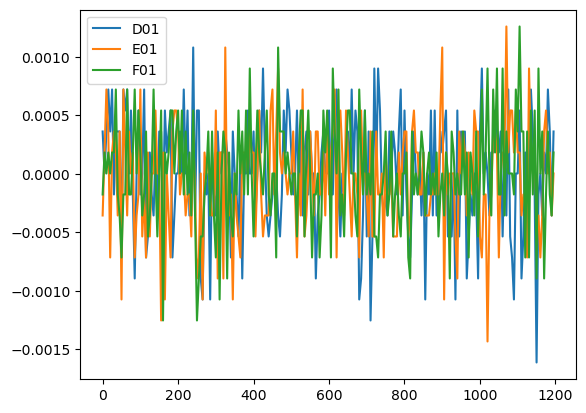

In [411]:
summary_FI_list_norm[0][summary_decryption_list[0].loc[(summary_decryption_list[0].samples == 'NCC') & (summary_decryption_list[0].abx_c == 100)].index].plot()

<AxesSubplot: >

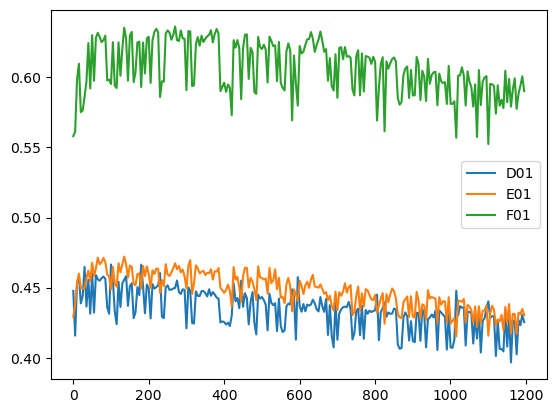

In [417]:
summary_OD_list[0][summary_decryption_list[0].loc[(summary_decryption_list[0].samples == 'NCC') & (summary_decryption_list[0].abx_c == 100)].index].plot()

## Plotting FI

In [10]:
plate_decryption_df['[NH4]2SO4_c_mM'].unique()
data_by_am_c_dict.keys()

dict_keys([0, 250, 500, 750, 1000])

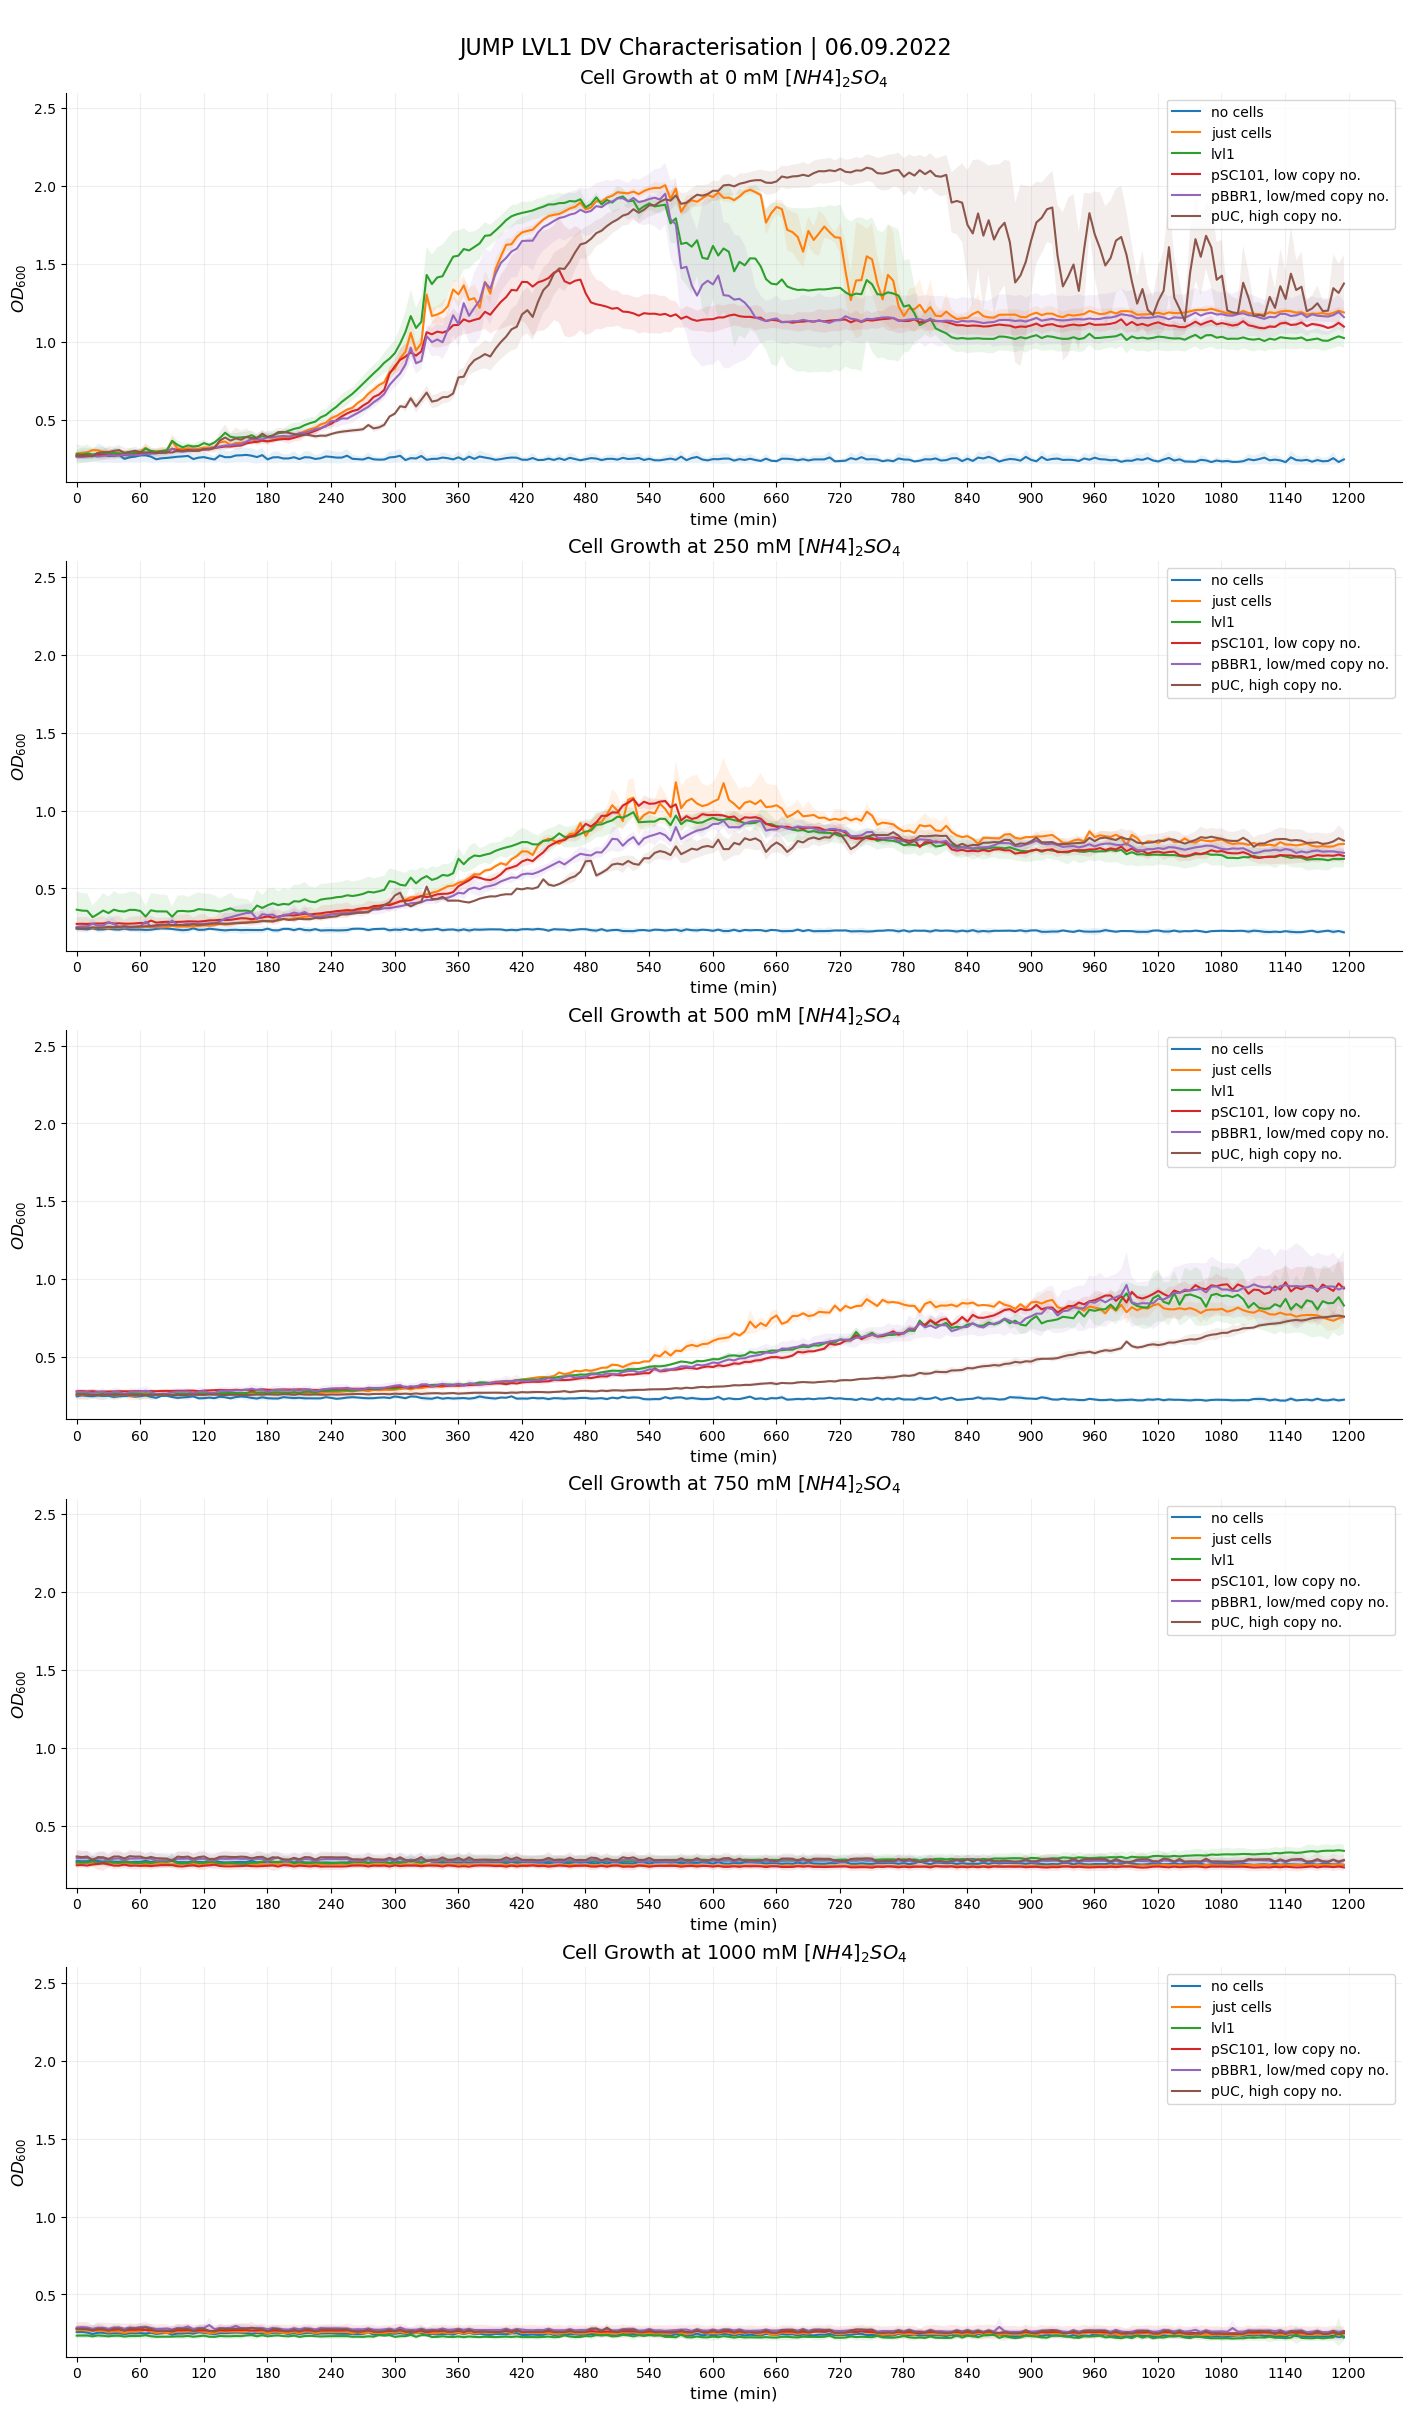

In [11]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(5,1, figure=fig)
plt.suptitle(f"\nJUMP LVL1 DV Characterisation | 06.09.2022",size=16)
plot_row = 0

test_df = OD600_df
for conc in plate_decryption_df['[NH4]2SO4_c_mM'].unique():
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.6])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1

#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [12]:
(32_000 - 2000) / 12

2500.0

In [14]:
renaming_dict = dict(zip(plate_decryption_df.name.unique(), ['empty NC','DH5⍺ NC','LVL1 NC', 'pSC101', 'pBBR1', 'pUC']))
renaming_dict

{'no cells': 'empty NC',
 'just cells': 'DH5⍺ NC',
 'lvl1': 'LVL1 NC',
 'pSC101, low copy no.': 'pSC101',
 'pBBR1, low/med copy no.': 'pBBR1',
 'pUC, high copy no.': 'pUC'}

In [15]:
color_list = sns.color_palette("tab10",len(plate_decryption_df.name.unique()))
color_list_two = sns.color_palette("tab10",len(plate_decryption_df.name.unique())+1)

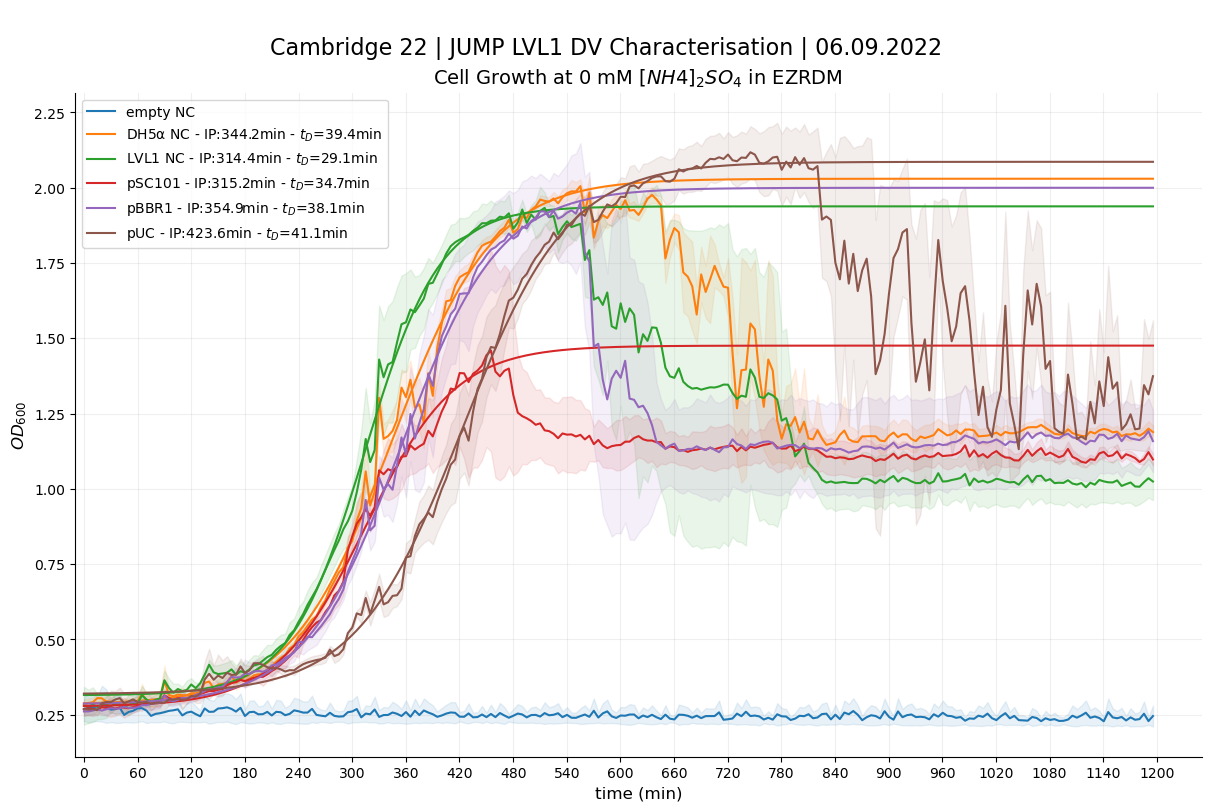

In [16]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"\nCambridge 22 | JUMP LVL1 DV Characterisation | 06.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])

test_df = OD600_df
samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
midpoint_list, carrying_capacity_l = [], []
popt_list = []

replicate_no = 3
conc = 0
for idx, run_replicate_wells in enumerate(divide_chunks( data_by_am_c_dict[conc].index, replicate_no )[:]):
    xdata= test_df[run_replicate_wells].index
    ydata= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    xdata_fit = ydata[:ydata.idxmax()].index
    ydata_fit = ydata[:ydata.idxmax()]
    sample_name = renaming_dict[plate_decryption_df.loc[run_replicate_wells[0],'name']]
    # 1- average line plot
    if idx==0:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx], label=f"{sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
    else:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx])
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    ax1.fill_between(xdata, (ydata-ci), (ydata+ci), alpha=.1, color=color_list[idx])
    # curve fit (excluding medium negative control)
    if idx!=0:
        p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(xdata, sigmoid(xdata, *popt), label=f"{sample_name} - IP:{round(popt[1],1)}min - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=color_list_two[idx])

    ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$ in EZRDM",size=14)
    ax1.set_ylabel("$OD_{600}$",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    #ax1.set_ylim([0.1,2.6])
    ax1.set_xlim([-10,1250])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.legend()
    plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc0_curve_fits.png", dpi=300)

In [17]:
ydata= test_df[run_replicate_wells].mean(axis=1)
xdata_fit = ydata[:ydata.idxmax()].index
ydata[:ydata.idxmax()]
ydata, len(xdata_fit)

(time_s
 0.000000       0.268633
 5.000000       0.266633
 10.000000      0.268467
 15.000000      0.265167
 20.000000      0.287367
                  ...   
 1175.516667    1.197800
 1180.516667    1.200100
 1185.516667    1.344567
 1190.516667    1.313833
 1195.516667    1.374100
 Length: 240, dtype: float64,
 150)

In [18]:
l_ = ['C', 'Low', 'Medium', 'High']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/indexes/base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)

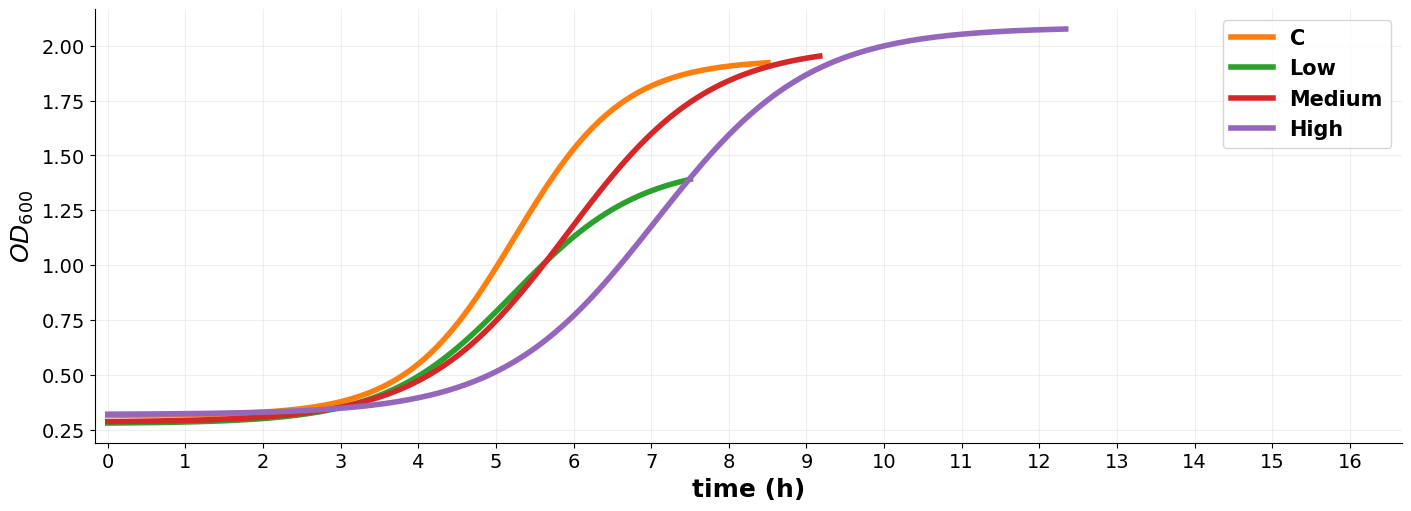

In [19]:
fig = plt.figure(figsize=(14,5), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
#plt.suptitle(f"\nCambridge 22 | JUMP LVL1 DV Characterisation | 06.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])

test_df = OD600_df
samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
midpoint_list, carrying_capacity_l = [], []
popt_list = []

replicate_no = 3
conc = 0
for idx, run_replicate_wells in enumerate(divide_chunks( data_by_am_c_dict[conc].index, replicate_no )[1:]):
    xdata= test_df[run_replicate_wells].index
    ydata= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    pol = 5
    xdata_fit = ydata[:ydata.idxmax()-pol].index
    ydata_fit = ydata[:ydata.idxmax()-pol]
    xdata_fit_death = ydata[ydata.idxmax()-pol:].index
    ydata_fit_death = ydata[ydata.idxmax()-pol:]
    sample_name = renaming_dict[plate_decryption_df.loc[run_replicate_wells[0],'name']]
    # 1- average line plot
    # if idx==0:
    #     sns.lineplot(ax = ax1, data = ydata, color=color_list[idx], label=f"{sample_name}")
    # else:
    #     sns.lineplot(ax = ax1, data = ydata, color=color_list[idx])
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    # curve fit (excluding medium negative control)
    if idx!=0:
        top_idx = len(xdata_fit)
        p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is a mandatory initial guess
        popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(xdata[:top_idx], sigmoid(xdata, *popt)[:top_idx], label=f"{l_[idx-1]}", color=color_list_two[idx], linewidth=4)
        #
        # if idx>1:
        #     #top_idx = ydata_fit_death.argmax()
        #     p0 = [max(ydata_fit_death), np.mean(xdata_fit_death),0.5,min(ydata_fit_death)] # this is a mandatory initial guess
        #     popt, pcov = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0)#, method='lm')
        #     # save fitted curve stats
        #     samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        #     midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        #     popt_list.append(popt)
        #     plt.plot(xdata[top_idx:], sigmoid(xdata, *popt)[top_idx:], color=color_list_two[idx], linewidth=4)
    ax1.set_ylabel("$OD_{600}$",fontsize=18, fontweight='bold')
    ax1.set_xlabel(f"time (h)",fontsize=18, fontweight='bold')
    plt.xticks(np.arange(min(x), max(x)+60, 60.0), list(range(0,21)),fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim([-10,1000])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    #ax1.set_xlim(0,900)
    plt.grid(True,alpha=0.2)
    plt.legend(prop={'size': 15,'weight':'bold'})
plt.savefig(f"image0.pdf", dpi=300)
plt.show()

In [20]:
75*2.2

165.0

<AxesSubplot: xlabel='time_s'>

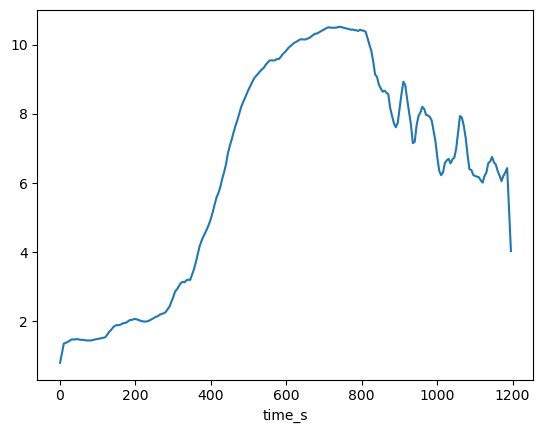

In [21]:
ydata.rolling(5, min_periods=1, center=True).sum().plot()

In [22]:
min(ydata_fit_death), np.median(xdata_fit_death),-1,min(ydata_fit_death)

(1.1316666666666668, 967.9166666666666, -1, 1.1316666666666668)

In [23]:
p0 = [max(ydata_fit_death), np.median(xdata_fit_death),-1, min(ydata_fit_death)] # this is a mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata_fit_death, ydata_fit_death, p0 )#,

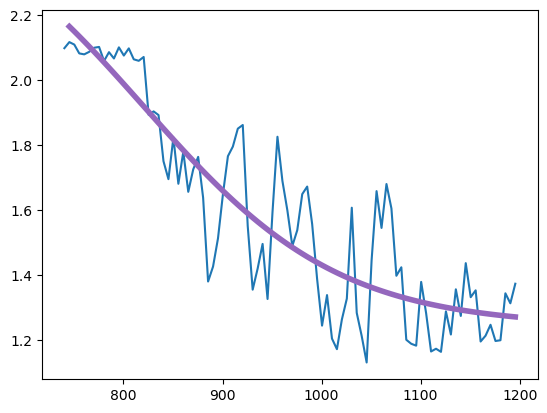

In [24]:
plt.plot(xdata_fit_death, ydata_fit_death)
plt.plot(xdata[top_idx:], sigmoid(xdata, *popt)[top_idx:], color=color_list_two[idx], linewidth=4)

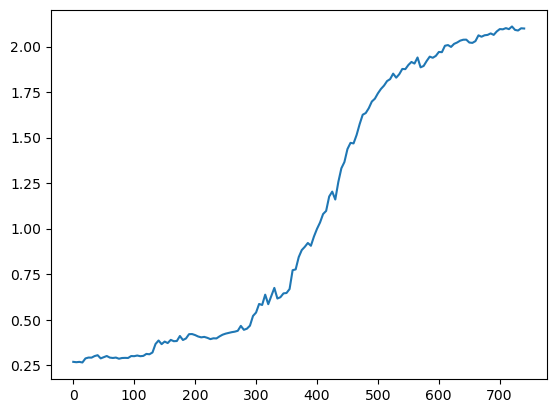

In [25]:
plt.plot(xdata_fit, ydata_fit)

In [26]:
xdata.argmax()

239

In [29]:
# save as DataFrame
summary_stats = pd.DataFrame([samples_list, growth_rate_dt_list, std_growth_rate_list, midpoint_list, carrying_capacity_l])
summary_stats = summary_stats.T
summary_stats.columns = ['constructs','dt_gr','std_dt_gr','midpoint','carrying_capacity']
# convert to doubling times
summary_stats['dt'] = summary_stats.dt_gr.apply(lambda x: np.log(2)/x)
summary_stats['dt_upper'] = (summary_stats.dt_gr + summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)
summary_stats['dt_lower'] = (summary_stats.dt_gr - summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)

In [30]:
xdata[:int(ydata.idxmax())], ydata[:ydata.idxmax()]
xdata[len(ydata[:ydata.idxmax()])]
#xdata[ydata.idxmax()]
ydata[:ydata.idxmax()].index

Float64Index([               0.0,                5.0,               10.0,
                            15.0,               20.0,               25.0,
                            30.0,               35.0, 40.016666666666666,
              45.016666666666666,
              ...
                           700.3,  705.3166666666667,  710.3166666666667,
               715.3166666666667,  720.3166666666667,  725.3166666666667,
               730.3166666666667,  735.3166666666667,  740.3333333333334,
               745.3333333333334],
             dtype='float64', name='time_s', length=150)

In [31]:
summary_stats#.to_csv('220906_iGEM22_sfGFPcharact_test1_ammconc0_summary_stats.csv')

constructs     dt_gr std_dt_gr    midpoint carrying_capacity         dt  \
0    LVL1 NC  0.023872  0.000561  314.391941          1.646982  29.036102   
1     pSC101  0.020345  0.000747  313.708062          1.202568  34.070371   
2      pBBR1  0.018201  0.000389  354.968327          1.734589  38.083605   
3        pUC  0.016892    0.0003  423.457392          1.782292  41.034674   

    dt_upper   dt_lower  
0  28.369870  29.734379  
1  32.863029  35.369807  
2  37.286367  38.915680  
3  40.319566  41.775606

In [32]:
[np.log(2)/x[2] for x in popt_list]

[29.03610247119983, 34.07037071421888, 38.083604960949025, 41.034673927456694]

## Plotting sfGFP Intensities

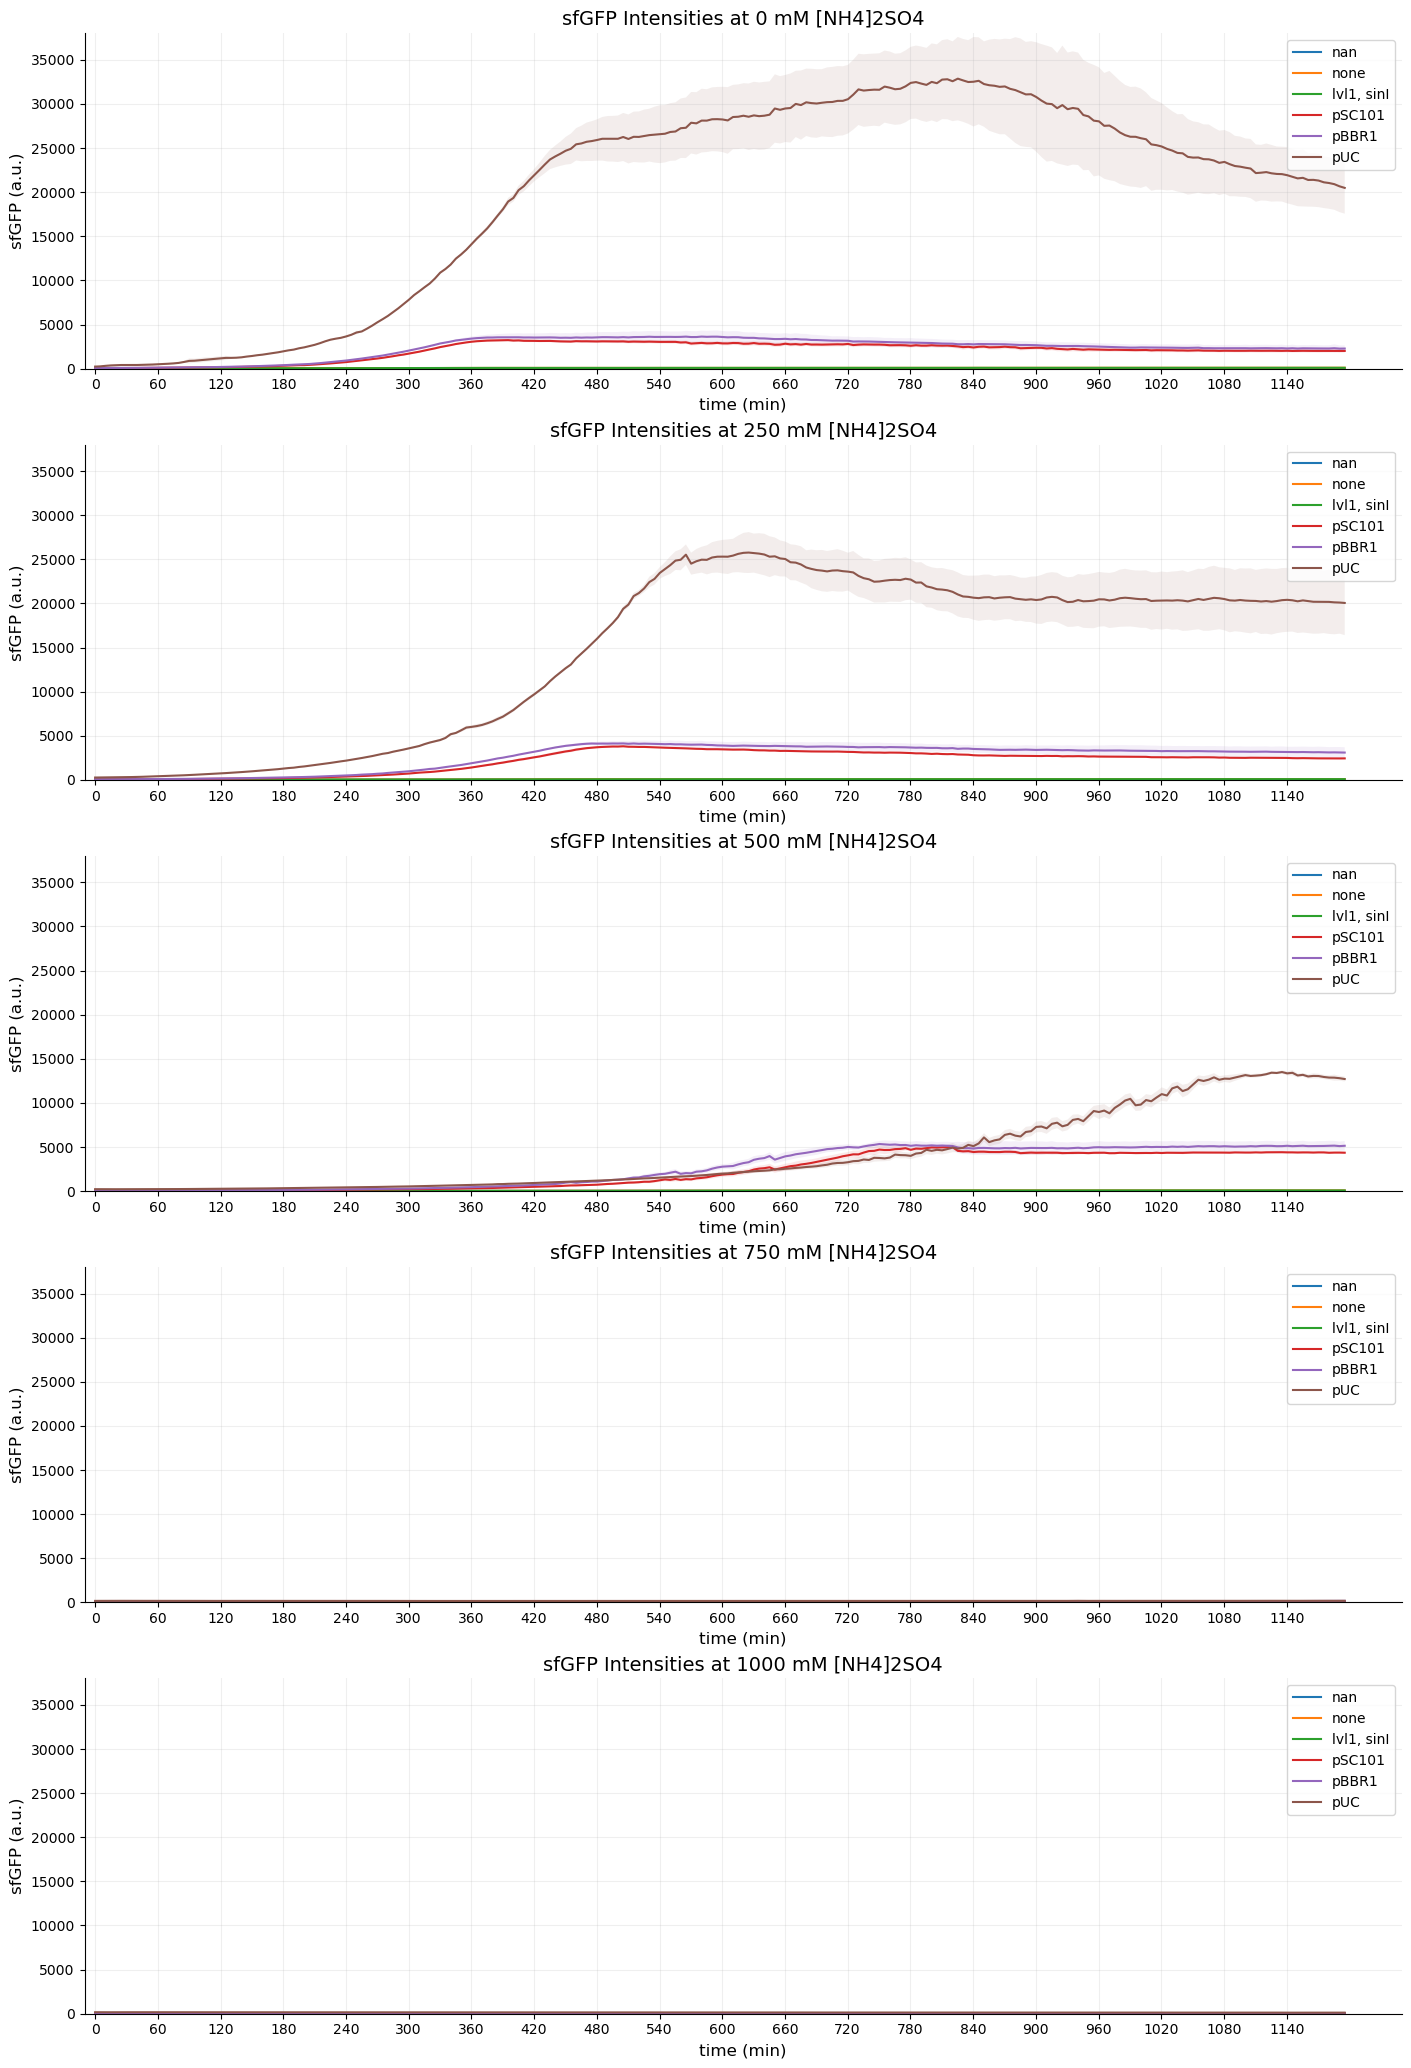

In [33]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(6,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = FI_gain800_df
for conc in plate_decryption_df['[NH4]2SO4_c_mM'].unique():
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no=3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        if plate_decryption_df.loc[run_replicate_wells[0],'name'] !='none':
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"sfGFP Intensities at {conc} mM [NH4]2SO4",size=14)
        ax1.set_ylabel("sfGFP (a.u.)",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+1, 60.0))
        ax1.set_ylim([0,38_000])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

    plot_row+=1
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_FIs_gain800.png", dpi=300)

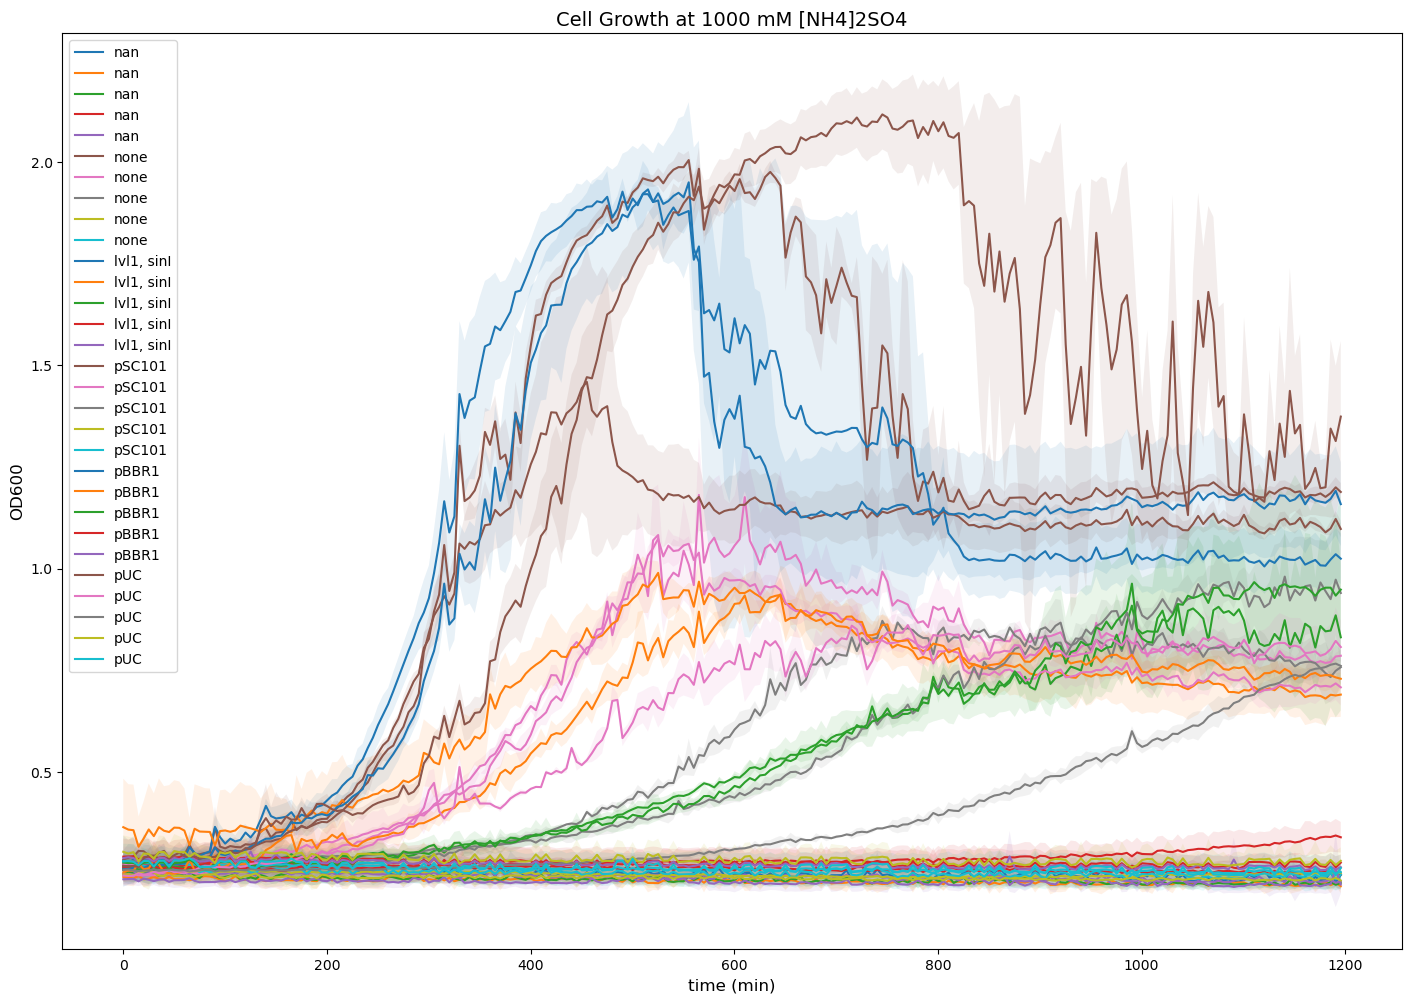

In [34]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df=OD600_df

ax1= fig.add_subplot(gs[0,0])
for run_replicate_wells in divide_chunks( plate_decryption_df.index, 3 ):
    replicate_no=3
    x= test_df[run_replicate_wells].index
    y= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
    # 2- confidence interval
#     ci = 1.95 * np.std(y)/np.sqrt(len(x))
#     ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
    ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

    ax1.set_title(f"Cell Growth at {conc} mM [NH4]2SO4",size=14)
    ax1.set_ylabel(f"OD600",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    


## ANOVA Analysis - OD600

In [35]:
means_zero_amm = {}
var_zero_amm = {}
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 )[1:]:
    exemplary_well_name = run_replicate_wells[0]
    means_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().mean(axis=1)
    var_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().var(axis=1)
means_zero_amm_df = pd.DataFrame(means_zero_amm)
var_zero_amm_df = pd.DataFrame(var_zero_amm)
var_pooled = var_zero_amm_df.mean(axis=1)
var_of_means = means_zero_amm_df.var(axis=1)
F_over_time = (3*var_of_means)/var_pooled

<AxesSubplot: xlabel='time_s'>

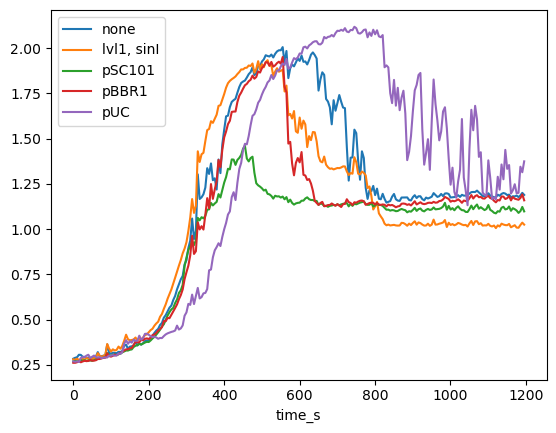

In [36]:
means_zero_amm_df.plot()

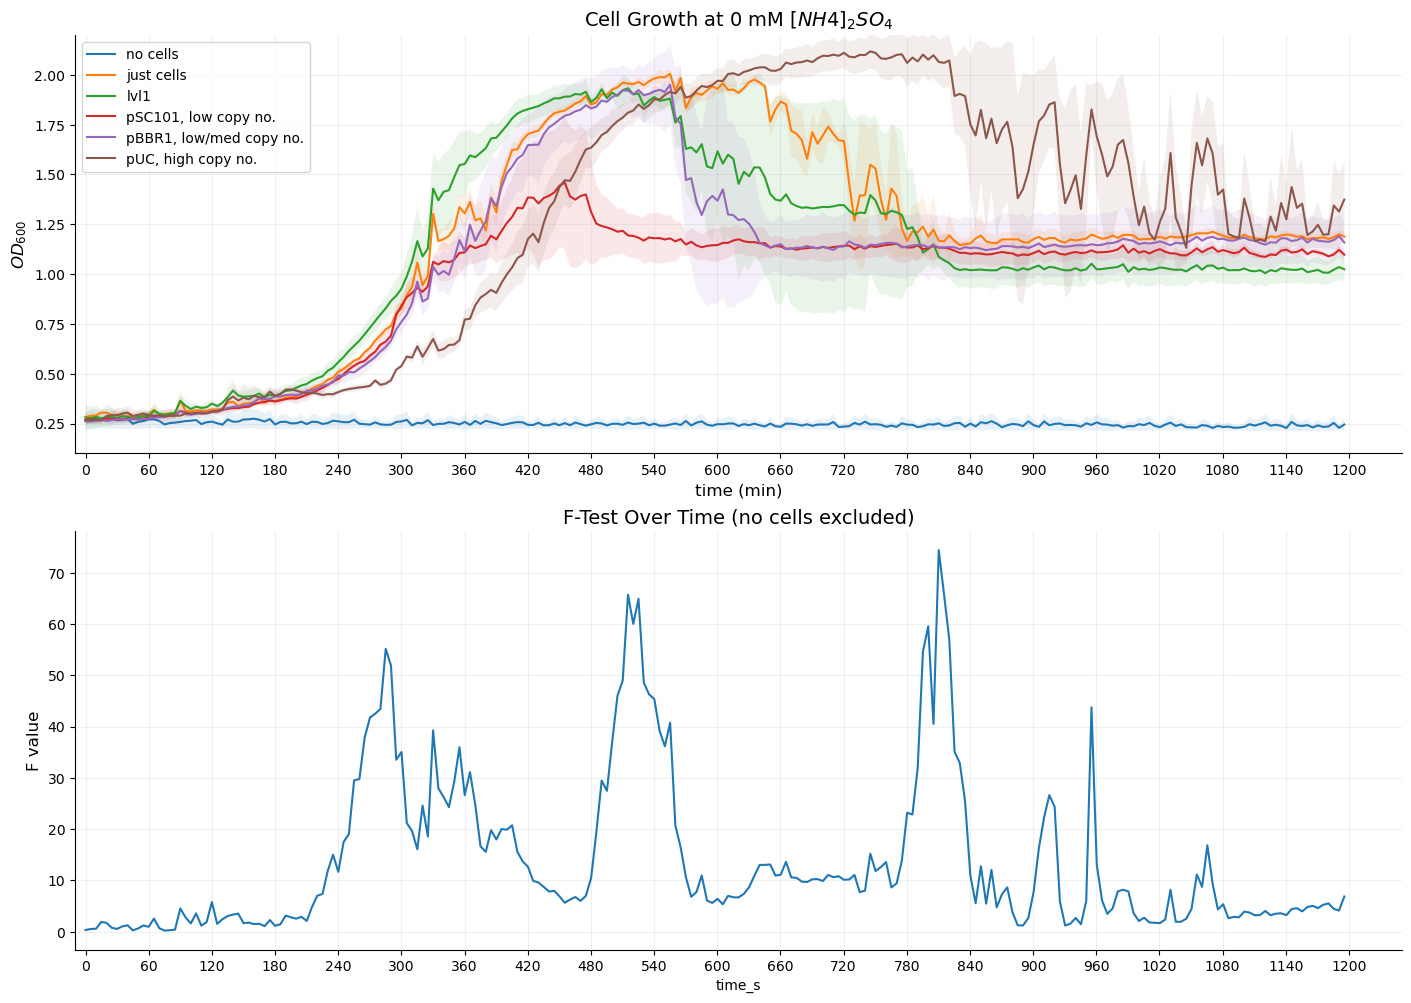

In [37]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(2,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = OD600_df
for conc in [plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]]:
    ax1= fig.add_subplot(gs[0,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.2])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

ax2= fig.add_subplot(gs[1,0]) 
sns.lineplot(ax = ax2,
                     data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")

ax2.set_title(f"F-Test Over Time (no cells excluded)",size=14)
ax2.set_ylabel("F value",size=12)
ax1.set_xlabel(f"time (min)",size=12)
plt.xticks(np.arange(min(x), max(x)+60, 60.0))
#ax2.set_ylim([0.1,2.2])
ax2.set_xlim([-10,1250])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid(True,alpha=0.2)
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [38]:
plate_decryption_df['[NH4]2SO4_c_mM'].unique()[1]

250

In [39]:
@interact
def show_moving_average (window_x=(1,10)):
    
    # ANPVA
    means_zero_amm = {}
    var_zero_amm = {}
    sample_names = []
    concentration_investigated = 0
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[concentration_investigated].index, 3 )[1:]:
        exemplary_well_name = run_replicate_wells[0]
        sample_names.append(data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid)
        means_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().mean(axis=1)
        var_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().var(axis=1)
    means_zero_amm_df = pd.DataFrame(means_zero_amm)
    var_zero_amm_df = pd.DataFrame(var_zero_amm)
    var_pooled = var_zero_amm_df.mean(axis=1)
    var_of_means = means_zero_amm_df.var(axis=1)
    F_over_time = (3*var_of_means)/var_pooled
    
    fig = plt.figure(figsize=(14,10), constrained_layout=True)
    gs = gridspec.GridSpec(2,1, figure=fig)
    plt.suptitle(f"\nCambridge iGEM22 JUMP LVL1 DV Characterisation Project | $[NH4]_{2}$$SO_{4}$ Factors | 06.09.2022",size=16)
    plot_row = 0
    
    test_df = OD600_df
    for conc in [concentration_investigated]:
        
        ax1= fig.add_subplot(gs[0,0])

        for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
            replicate_no = 3
            x= test_df[run_replicate_wells].index
            y= test_df[run_replicate_wells].mean(axis=1)
            variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
            # 1- average line plot
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

            ax1.set_title(f" Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
            ax1.set_ylabel("$OD_{600}$",size=12)
            ax1.set_xlabel(f"time (min)",size=12)
            plt.xticks(np.arange(min(x), max(x)+60, 60.0))
            ax1.set_ylim([0.1,2.2])
            ax1.set_xlim([-10,1250])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            plt.grid(True,alpha=0.2)

    ax2= fig.add_subplot(gs[1,0]) 
    sns.lineplot(ax = ax2,
                 data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")
    critical_value=11.283
    ax2.fill_between(x, (F_over_time), critical_value, alpha=.6, color='coral',where=F_over_time>critical_value)
    
    ax2.set_title(f"F-Test Timeseries ('no cells' excluded) - rolling average {window_x*5} min {['DH5⍺ alone','LVL1 neg. control']+sample_names[2:]}",size=14)
    ax2.set_ylabel("F value",size=12)
    ax2.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    ax2.set_ylim([-2.1,75.])
    ax2.set_xlim([-10,1250])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.hlines(11.283,0,12_000,color='red',linestyle='--')
    plt.text(950, 14, 'Critical F value for 0.1% = 11.283\n(5 samples & 3 replicates)', fontsize = 12, 
         bbox = dict(facecolor = 'white', edgecolor='white',alpha = 0.5),color='red')
    #plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc{concentration_investigated}_Fvalue_averages_{window_x*5}min.pdf", dpi=300)
    plt.show()

interactive(children=(IntSlider(value=5, description='window_x', max=10, min=1), Output()), _dom_classes=('wid…

In [40]:
F_over_time[]

SyntaxError: invalid syntax (2574623318.py, line 1)